# Prosper Loan - Data Visualization Project
## by Federico Finetti

## Preliminary Wrangling

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Here following we are going to load the dataset and describe its properties.

In [13]:
LoanDataRaw = pd.read_csv('prosperLoanData.csv')
LoanDataRaw.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [14]:
LoanDataRaw.shape

(113937, 81)

In [15]:
LoanDataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### Structure of the dataset

> The dataset is composed by 113937 rows and 81 columns. The columns are composed by different types of data: mainly float, but also integers, objects and boolean values.

### Main features of interest in the dataset

> The main features of interest in this dataset (and hypothesis that will be tested) are:
>> "**ProsperRating (numeric)**": as it is the main result of the risk parameters evaluation.
>
>> "**BorrowerRate**": as it is the value which should reward the company, proportionally to the risks taken, allowing it to make money without running out of business for default.
>
>> "**LoanStatus**": as it tells us what is the real status about each loan, and what ultimately defines the ability for the company to make money out of its risk evaluation abilities.


### Features in the dataset useful to support the investigation into the features of interest

> The features that will help to support my investigations into the features of interest (and hypothesis that will be tested) are the following ones:
>> "**DebtToIncomeRatio**": the higher this value is, the lower should be the rating as it is proportional to the likelyhood for the borrower to pay the debt back.
>
>> "**StatedMonthlyIncome**": the more money someone earns, the more likely that this person will be able to pay the debt back.
>
>> "**IncomeVerifiable**": if the income is verifiable, this is an additional reassurance that the company can trust the "StatedMonthlyIncome" value, therefore have a better evaluation of the risk. Bottomline: having this value "True", keeping all the other variables constant, would decrease the risk of default.
>
>> "**Term**": with the term of the loan, would also increase the risk of insolvency of the borrower, therfore we would expect the interest rate to increase and the borrower rating to decrease
>
>> "**EmploymentStatus**": we would expect that someone employed is assessed as a lower risk borrowrs, compared to somenone who is unemployed, as the first one could count on a source of income, while the second one can not
>
>> "**EmploymentStatusDuration**": the longer a borrower has held a job, the less risky he sould be, as this would be a sign of stability and lower risk of losing the job
>
>> "**AmountDelinquent**": the higher the amount, the higher should be the risk
>
>> "**DelinquenciesLast7Years**": the more the occasions of delinquency, the higher should be the risk
>
>> "**Recommendations**": the higher the number of recommendations, the lower should be the risk

## Dataset preparation: Cleaning

In [16]:
LoanDataFull = LoanDataRaw.copy()  # make a copy of the original dataset

#### Here following we are going to find and remove the duplicates, with the same "ListingKey" and "ListingNumber"

In [17]:
print(len(LoanDataFull[LoanDataFull.ListingKey.duplicated()]));
LoanDataFull[LoanDataFull.ListingKey.duplicated()].head()

871


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037000000,NaN,60,Current,NaN,0.14528,0.1224,0.1124,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287000000,NaN,36,Current,NaN,0.24205,0.2045,0.1945,...,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [18]:
LoanDataFull.query('ListingKey == "0F043596202561788EA13D5"') # check in this example that all the fields are duplicated

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.0762,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.0762,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [19]:
print(len(LoanDataFull[LoanDataFull.ListingNumber.duplicated()]));
LoanDataFull[LoanDataFull.ListingNumber.duplicated()].head()

871


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037000000,NaN,60,Current,NaN,0.14528,0.1224,0.1124,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287000000,NaN,36,Current,NaN,0.24205,0.2045,0.1945,...,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [20]:
LoanDataFull.query('ListingNumber == 1055932')  # check in this example that all the fields are duplicated

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
998,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.1771,0.1535,0.1435,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.1771,0.1535,0.1435,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
57494,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.1771,0.1535,0.1435,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


#### Here following we are going to drop the duplicates

In [21]:
ListIndexes = LoanDataFull[LoanDataFull.ListingKey.duplicated()].index
LoanDataNoDupl = LoanDataFull.drop(ListIndexes)
LoanDataNoDupl.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [22]:
# check in the previous example that there is only one row for the "ListingKey" that before was duplicated 
LoanDataNoDupl.query('ListingKey == "0F043596202561788EA13D5"')  

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.0762,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [23]:
# check that the number of rows decreased to the expected number of 113937 - 871 = 113066
len(LoanDataNoDupl)

113066

#### All the duplicates have successfully been removed

#### Considering that the parameter "ProsperRating (numeric)" is only applicable since August 2009, we will have to use only the data from that moment onwards

In [24]:
# Converting "ListingCreationDate" column, from string to date format
LoanDataNoDupl['ListingCreationDate'] = pd.to_datetime(LoanDataNoDupl['ListingCreationDate'])

In [25]:
# Selecting only data with "ListingCreationDate" from August 2009 onwards, 
# as the parameter "ProsperRating (numeric)" is only applicable since then.

LoanDataSinceAug09 = LoanDataNoDupl.query('ListingCreationDate >= "01-08-2009"')
print(len(LoanDataSinceAug09))
LoanDataSinceAug09.head()

84010


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


#### We are now going to create a new dataset with only the variables of interest for this analysis

In [26]:
LoanDataSelect = LoanDataSinceAug09[['ProsperRating (numeric)','BorrowerRate', 'LoanStatus', 'DebtToIncomeRatio',
                                     'StatedMonthlyIncome','IncomeVerifiable','Term','EmploymentStatus',
                                     'EmploymentStatusDuration','AmountDelinquent','DelinquenciesLast7Years',
                                     'Recommendations']]
LoanDataSelect.head(2)

,ProsperRating (numeric),BorrowerRate,LoanStatus,DebtToIncomeRatio,StatedMonthlyIncome,IncomeVerifiable,Term,EmploymentStatus,EmploymentStatusDuration,AmountDelinquent,DelinquenciesLast7Years,Recommendations
1,6.0,0.0920,Current,0.18,6125.0,True,36,Employed,44.0,0.0,0.0,0
3,6.0,0.0974,Current,0.15,2875.0,True,36,Employed,113.0,10056.0,14.0,0


In [27]:
LoanDataSelect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84010 entries, 1 to 113936
Data columns (total 12 columns):
ProsperRating (numeric)     83982 non-null float64
BorrowerRate                84010 non-null float64
LoanStatus                  84010 non-null object
DebtToIncomeRatio           76795 non-null float64
StatedMonthlyIncome         84010 non-null float64
IncomeVerifiable            84010 non-null bool
Term                        84010 non-null int64
EmploymentStatus            84010 non-null object
EmploymentStatusDuration    83991 non-null float64
AmountDelinquent            84010 non-null float64
DelinquenciesLast7Years     84010 non-null float64
Recommendations             84010 non-null int64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 7.8+ MB


#### Drop all the rows with null values

In [28]:
LoanDataClean = LoanDataSelect.dropna()

In [29]:
LoanDataClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76754 entries, 1 to 113936
Data columns (total 12 columns):
ProsperRating (numeric)     76754 non-null float64
BorrowerRate                76754 non-null float64
LoanStatus                  76754 non-null object
DebtToIncomeRatio           76754 non-null float64
StatedMonthlyIncome         76754 non-null float64
IncomeVerifiable            76754 non-null bool
Term                        76754 non-null int64
EmploymentStatus            76754 non-null object
EmploymentStatusDuration    76754 non-null float64
AmountDelinquent            76754 non-null float64
DelinquenciesLast7Years     76754 non-null float64
Recommendations             76754 non-null int64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 7.1+ MB


#### Sort the ordinal qualitative variable "LoanStatus" and "EmploymentStatus" in order of decreasing risk

In [30]:
LoanDataClean.LoanStatus.value_counts()

Current                   51702
Completed                 17688
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        716
Past Due (31-60 days)       325
Past Due (91-120 days)      277
Past Due (61-90 days)       274
Past Due (16-30 days)       242
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

In [31]:
level_order = ['Defaulted','Chargedoff','Past Due (>120 days)','Past Due (91-120 days)','Past Due (61-90 days)','Past Due (31-60 days)','Past Due (16-30 days)','Past Due (1-15 days)','Current','FinalPaymentInProgress','Completed']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
LoanDataClean['LoanStatus'] = LoanDataClean['LoanStatus'].astype(ordered_cat)

C:\Users\Fede\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
LoanDataClean.EmploymentStatus.value_counts()

Employed         65159
Full-time         7577
Other             3456
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

In [33]:
level_order = ['Not employed','Self-employed','Other','Retired','Part-time','Full-time','Employed']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
LoanDataClean['EmploymentStatus'] = LoanDataClean['EmploymentStatus'].astype(ordered_cat)

C:\Users\Fede\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Univariate Exploration

> In this section we will investigate the distributions of individual variables.

In [34]:
# base statistics to decide intervals to use to plot the data
LoanDataClean.describe()

,ProsperRating (numeric),BorrowerRate,DebtToIncomeRatio,StatedMonthlyIncome,Term,EmploymentStatusDuration,AmountDelinquent,DelinquenciesLast7Years,Recommendations
count,76754.000000,76754.000000,76754.000000,76754.000000,76754.000000,76754.000000,76754.000000,76754.000000,76754.000000
mean,4.129101,0.193650,0.258680,5964.226818,42.701827,104.293327,968.945436,3.752352,0.016455
std,1.660821,0.074016,0.319748,5089.882209,11.711271,96.738892,7408.112758,9.459766,0.187078
min,1.000000,0.040000,0.000000,0.250000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.134900,0.150000,3529.687500,36.000000,31.000000,0.000000,0.000000,0.000000
50%,4.000000,0.184500,0.220000,5000.000000,36.000000,75.000000,0.000000,0.000000,0.000000
75%,5.000000,0.254900,0.320000,7166.666667,60.000000,149.000000,0.000000,2.000000,0.000000
max,7.000000,0.360000,10.010000,483333.333333,60.000000,755.000000,463881.000000,99.000000,19.000000


### Plot 'ProsperRating (numeric)' in an histogram

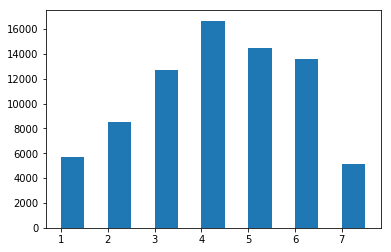

In [35]:
bin_edges = np.arange(1, LoanDataClean['ProsperRating (numeric)'].max()+1, 0.5) 
plt.hist(data = LoanDataClean, x = 'ProsperRating (numeric)', bins = bin_edges);
tick_locs = [1, 2, 3, 4, 5, 6, 7]
plt.xticks(tick_locs, tick_locs);

> Here we can see that the distribution looks normal, with most frequent values between 3 and 6

### Plot 'BorrowerRate' in an histogram

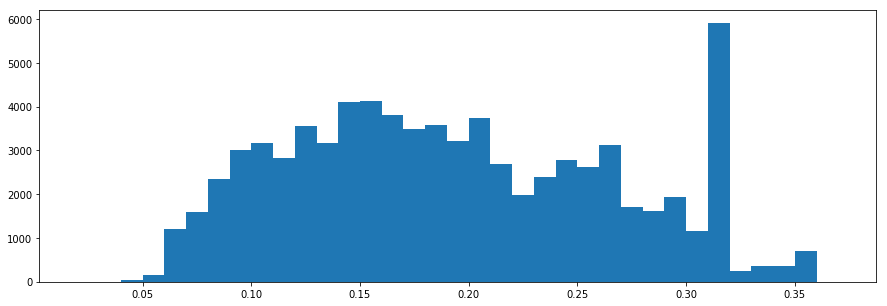

In [36]:
plt.figure(figsize = [15, 5])

bin_edges = np.arange(LoanDataClean['BorrowerRate'].min()-0.02, LoanDataClean['BorrowerRate'].max()+0.02, 0.01) 
plt.hist(data = LoanDataClean, x = 'BorrowerRate', bins = bin_edges); 

> We can see that the overall values have the highest frequency in the range 0.1 and 0.25, but with a big spike around 0.32

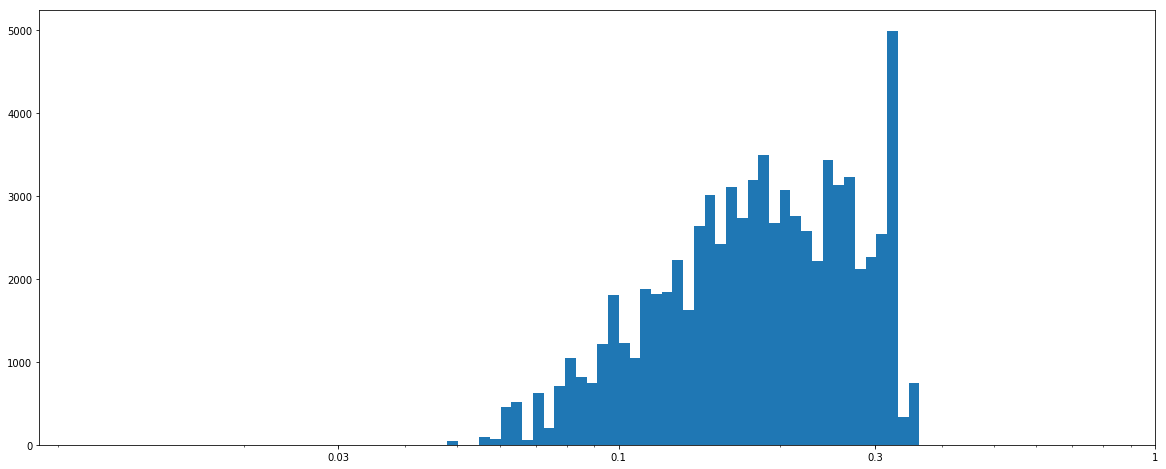

In [37]:
plt.figure(figsize = [20, 8])
bin_edges = 10 ** np.arange(-2, np.log10(LoanDataClean['BorrowerRate'].max())+0.05, 0.02)
plt.hist(data = LoanDataClean, x = 'BorrowerRate', bins = bin_edges);
plt.xscale('log')            
tick_locs = [0.03,0.1,0.3,1] 
plt.xticks(tick_locs, tick_locs); 

> Even transforming the data in a log-normal distribution the conclusions are the same: the overall distribution looks normal, with highest frequency at around 0.2, but with a big "unepected" spike at round 0.32.

### Plot 'LoanStatus' in a barchart 

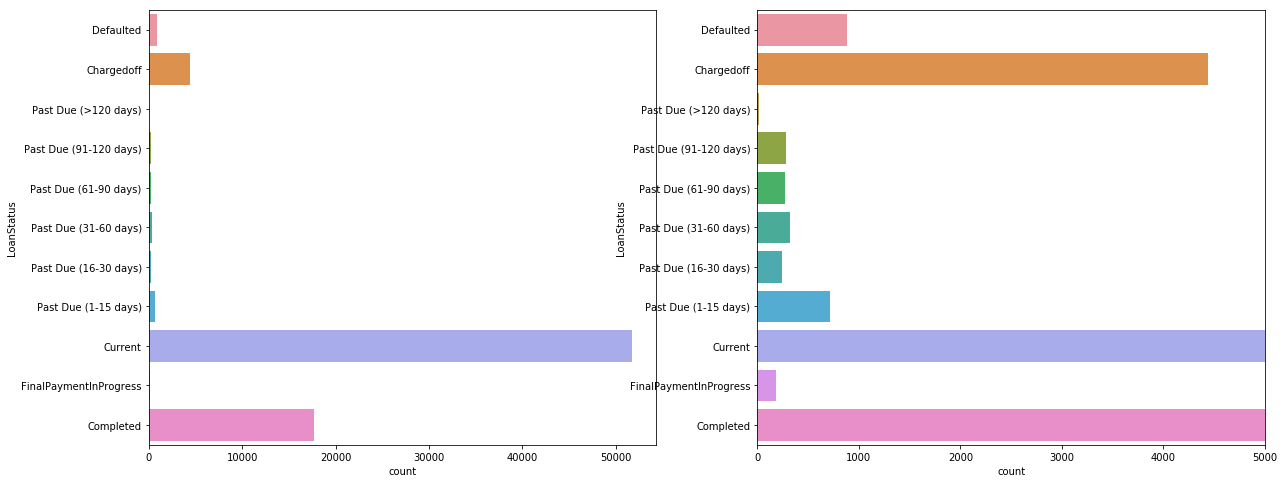

In [38]:
plt.figure(figsize = [20, 8])

# histogram on left: full data
plt.subplot(1, 2, 1)
sns.countplot(data = LoanDataClean, y = 'LoanStatus');

# histogram on right: zoom on values with lower frequency
plt.subplot(1, 2, 2)
sns.countplot(data = LoanDataClean, y = 'LoanStatus');
plt.xlim(0,5000);

> Here we can see that the highest frequency is for the status "Current", then "Completed and "Chargedoff". The other values have a much smaller frequency, which required to "zoom" in the chart to see the related columns

### Plot 'DebtToIncomeRatio' in a histogram

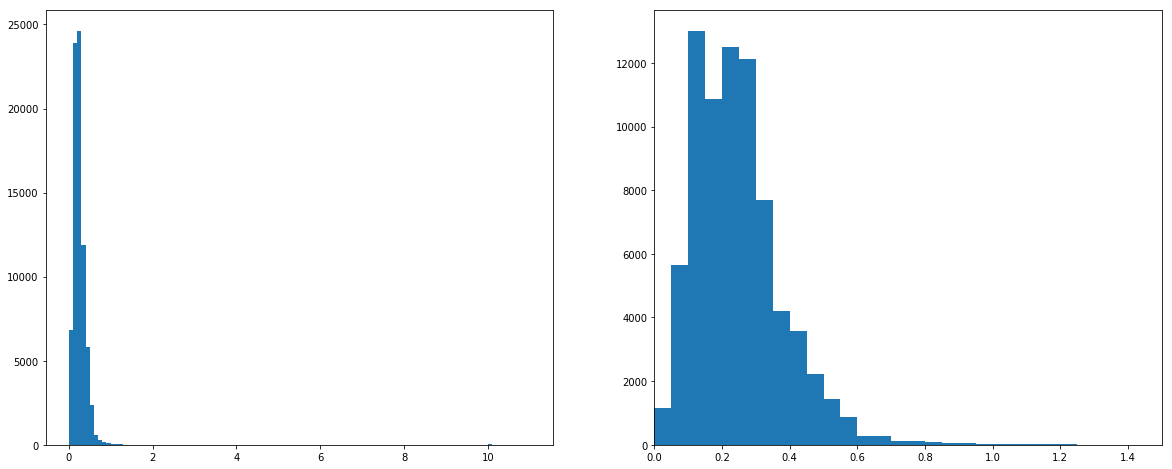

In [39]:
plt.figure(figsize = [20, 8])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, LoanDataClean['DebtToIncomeRatio'].max()+1, 0.1) 
plt.hist(data = LoanDataClean, x = 'DebtToIncomeRatio', bins = bin_edges); 

# histogram on right: zoon on left side of the full chart
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, LoanDataClean['DebtToIncomeRatio'].max()+1, 0.05) 
plt.hist(data = LoanDataClean, x = 'DebtToIncomeRatio', bins = bin_edges); 
plt.xlim(0,1.5);

> Here the vast majority of the datapoints lies in the extreme left, between 0 and 0.6, despite having 10 as the maximum

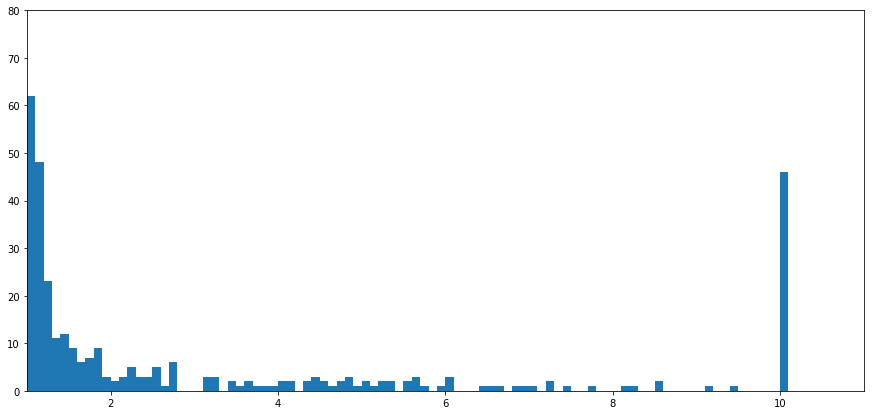

In [40]:
plt.figure(figsize = [15, 7])
bin_edges = np.arange(0, LoanDataClean['DebtToIncomeRatio'].max()+1, 0.1) 
plt.hist(data = LoanDataClean, x = 'DebtToIncomeRatio', bins = bin_edges); 
plt.xlim(1,11);
plt.ylim(0,80);

> Zooming in the range 1 - 11, we can see that from 2, moving to the right, there is no appreciable decrease in the frequency, worth noting a spike at the value of 10, due to the fact that this variable is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

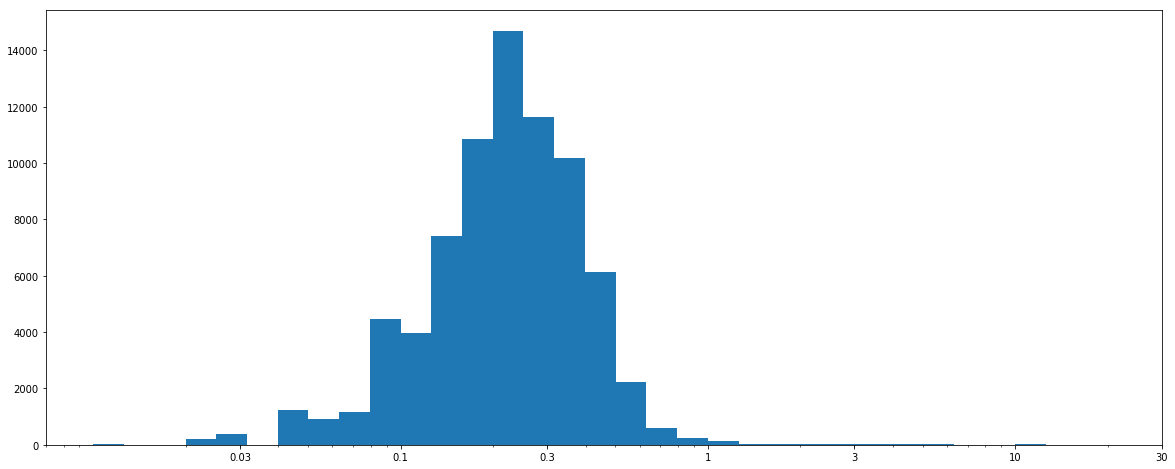

In [41]:
plt.figure(figsize = [20, 8])
bin_edges = 10 ** np.arange(-2, np.log10(LoanDataClean['DebtToIncomeRatio'].max())+0.1, 0.1)
plt.hist(data = LoanDataClean, x = 'DebtToIncomeRatio', bins = bin_edges);
plt.xscale('log')            
tick_locs = [0.03,0.1,0.3,1,3,10, 30] 
plt.xticks(tick_locs, tick_locs);   

> Rescaling the values on a log-normal scale, the distribution now look perfectly normal, with max frequency at the value of 0.2

### Plot 'StatedMonthlyIncome' in a histogram

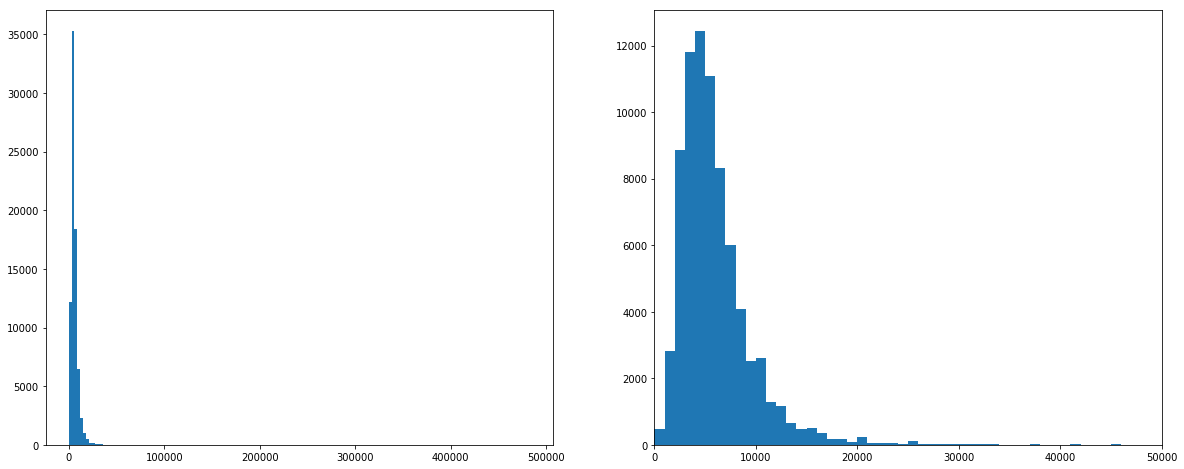

In [42]:
plt.figure(figsize = [20, 8])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, LoanDataClean['StatedMonthlyIncome'].max()+1, 3000) 
plt.hist(data = LoanDataClean, x = 'StatedMonthlyIncome', bins = bin_edges); 

# histogram on right: zoom on left side of the full chart
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, LoanDataClean['StatedMonthlyIncome'].max()+1, 1000) 
plt.hist(data = LoanDataClean, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlim(0,50000);

> It looks like all the data are condensed in the range 0 - 15000, well below the maximum, which is "483333". This requires further investigation for the outliers

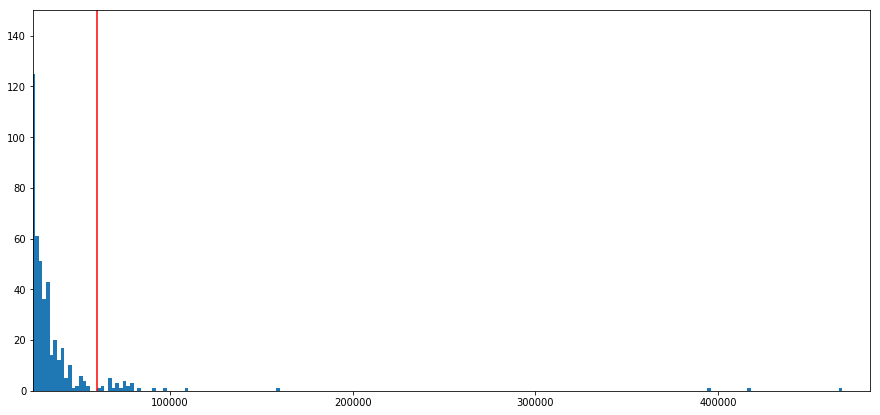

In [43]:
# zoom in the range 40000 - max
plt.figure(figsize = [15, 7])
bin_edges = np.arange(0, LoanDataClean['StatedMonthlyIncome'].max()+1, 2000) 
plt.hist(data = LoanDataClean, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlim(25000,LoanDataClean['StatedMonthlyIncome'].max()+1);
plt.ylim(0,150);
plt.axvline(60000, c='red');   

> Visually I would consider outliers the data values bigger the 60000

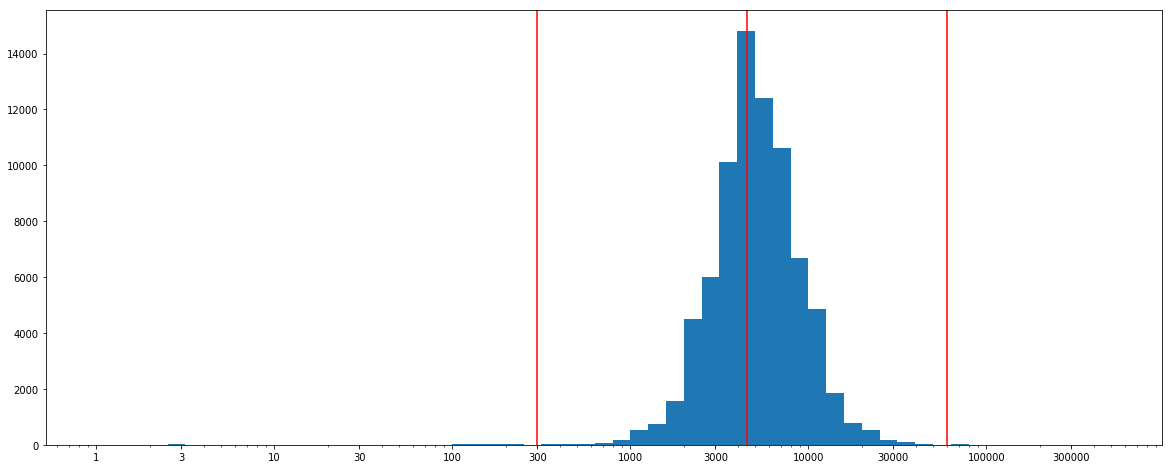

In [44]:
plt.figure(figsize = [20, 8])
bin_edges = 10 ** np.arange(0, np.log10(LoanDataClean['StatedMonthlyIncome'].max())+0.1, 0.1)
plt.hist(data = LoanDataClean, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xscale('log')            
tick_locs = [1,3,10,30,100,300,1000,3000,10000,30000,100000,300000] 
plt.xticks(tick_locs, tick_locs);
plt.axvline(4500, c='red'); 
plt.axvline(60000, c='red'); 
plt.axvline(300, c='red'); 

> After performing the log-normal transformation, the distribution looks perfectly normal, with highest frequency at around 4500. Again I would consider outliers the datapoints higher then 60000, but also smaller then 300.

### Plot 'IncomeVerifiable' in a barchart

True     76706
False       48
Name: IncomeVerifiable, dtype: int64

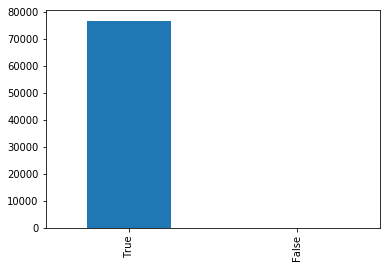

In [45]:
LoanDataClean.IncomeVerifiable.value_counts().plot(kind='bar');
LoanDataClean.IncomeVerifiable.value_counts()

In [46]:
len(LoanDataClean.query('IncomeVerifiable == True'))/len(LoanDataClean.IncomeVerifiable) # % True values

0.9993746254266879

> As it's evident, the vast majority (99.94%) of the values is "True".

### Plot  'Term' in a barchart

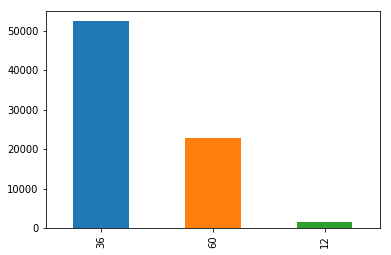

In [47]:
LoanDataClean.Term.value_counts().plot(kind='bar');

> Out of the three values listed, 36 months is the most frequent one, followed by 60 months, and finally 12 months as the least frequent term

### Plot 'EmploymentStatus' in a barchart

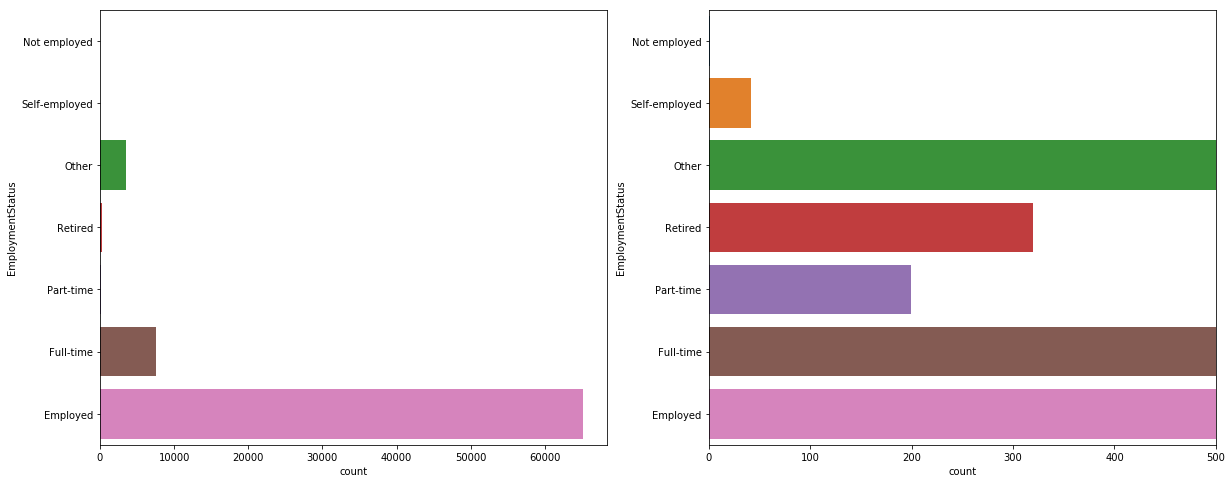

In [48]:
plt.figure(figsize = [20, 8])

# histogram on left: full data
plt.subplot(1, 2, 1)
sns.countplot(data = LoanDataClean, y = 'EmploymentStatus');

# histogram on right: zoom on values with lower frequency
plt.subplot(1, 2, 2)
sns.countplot(data = LoanDataClean, y = 'EmploymentStatus');
plt.xlim(0,500);

> We can see that the most frequent value is by far "Employed", followed by "Full-time" and "Other". The other values are very far from these frequencies

### Plot 'EmploymentStatusDuration' in a histogram

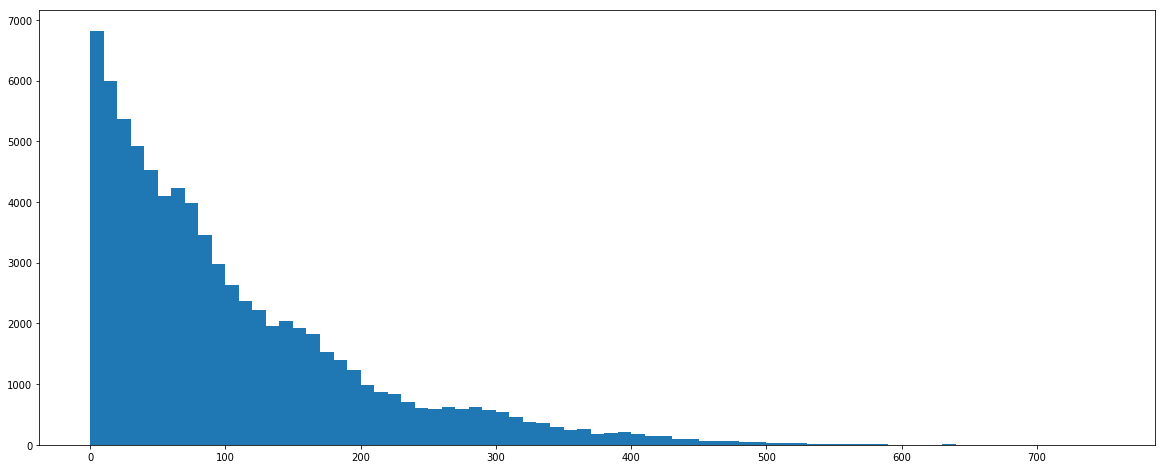

In [49]:
plt.figure(figsize = [20, 8])
bin_edges = np.arange(0, LoanDataClean['EmploymentStatusDuration'].max()+1, 10) 
plt.hist(data = LoanDataClean, x = 'EmploymentStatusDuration', bins = bin_edges); 

> The distribution of the employment status duration in months is skewed to the right, with the first bin having the maximum frequency.

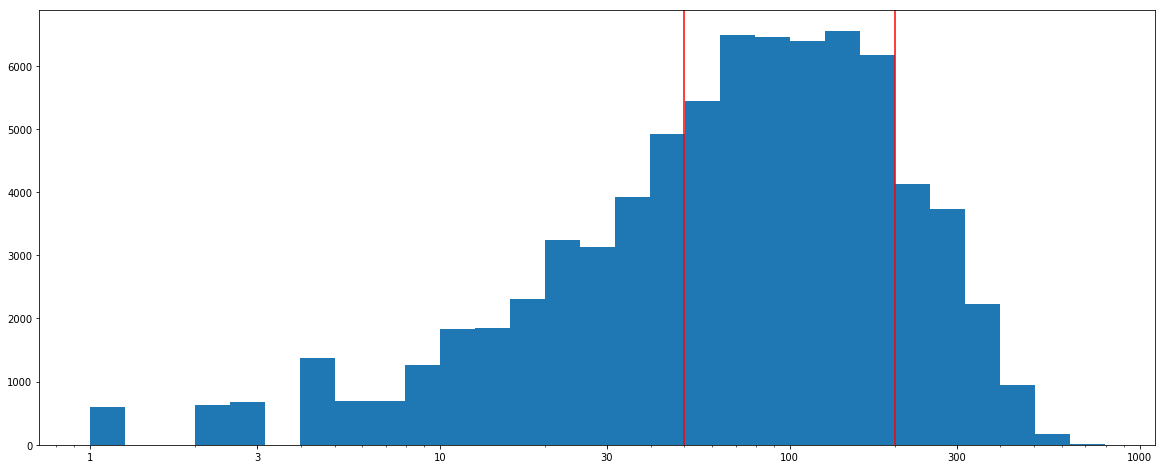

In [50]:
plt.figure(figsize = [20, 8])
bin_edges = 10 ** np.arange(0, np.log10(LoanDataClean['EmploymentStatusDuration'].max())+0.1, 0.1)
plt.hist(data = LoanDataClean, x = 'EmploymentStatusDuration', bins = bin_edges);
plt.xscale('log')            
tick_locs = [1,3,10,30,100,300,1000] 
plt.xticks(tick_locs, tick_locs);

plt.axvline(50, c='red'); 
plt.axvline(200, c='red'); 

> After the log-normal transformation, we can see that the distribution is now slightly skewed to the left, with highest frequency between 50 and 200

### Plot 'AmountDelinquent' in a histogram

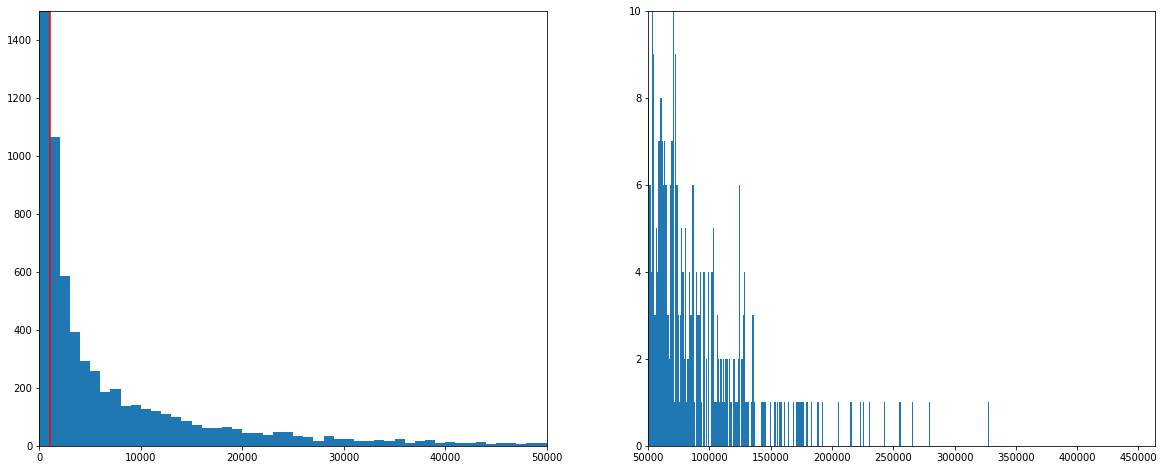

In [51]:
plt.figure(figsize = [20, 8])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, LoanDataClean['AmountDelinquent'].max()+1, 1000) 
plt.hist(data = LoanDataClean, x = 'AmountDelinquent', bins = bin_edges);
plt.ylim(0,1500);
plt.xlim(0,50000);
plt.axvline(1000, c='red'); 

# histogram on right: from 50000 to max
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, LoanDataClean['AmountDelinquent'].max()+1, 1000) 
plt.hist(data = LoanDataClean, x = 'AmountDelinquent', bins = bin_edges);
plt.ylim(0,10);
plt.xlim(50000,LoanDataClean['AmountDelinquent'].max()+1);

> The distribution of the amount delinquent is skewed to the right, with the datapoints in the first bin (range 0 - 1000) being by far the most frequent.

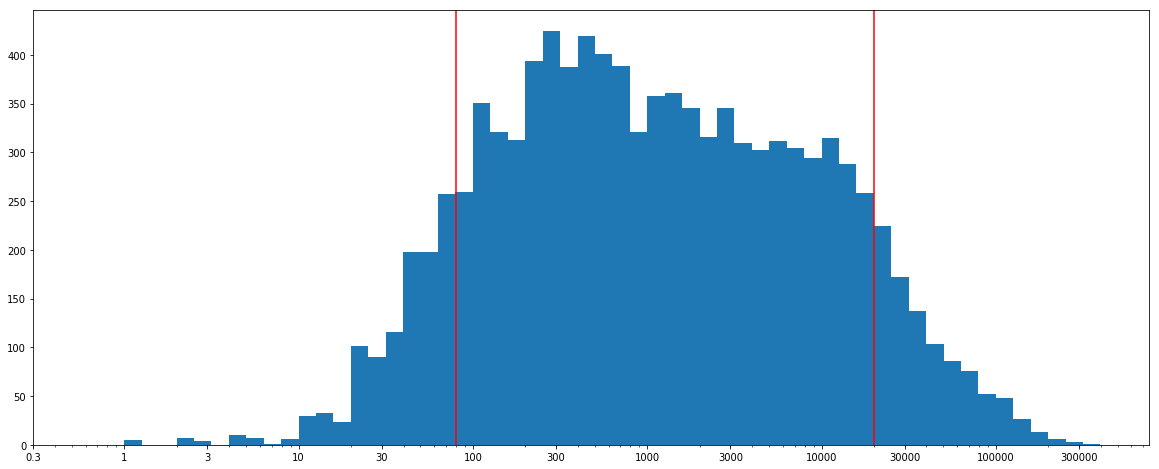

In [52]:
plt.figure(figsize = [20, 8])
bin_edges = 10 ** np.arange(0, np.log10(LoanDataClean['AmountDelinquent'].max()),0.1)
plt.hist(data = LoanDataClean, x = 'AmountDelinquent', bins = bin_edges);
plt.xscale('log')            
tick_locs = [0.3,1,3,10,30,100,300,1000,3000,10000,30000,100000,300000] 
plt.xticks(tick_locs, tick_locs);

plt.axvline(80, c='red'); 
plt.axvline(20000, c='red');

> After performing the log-normal transformation, the distribution looks normal, with the highest frequency in the range 80 - 20000

### Plot 'DelinquenciesLast7Years' in a histogram

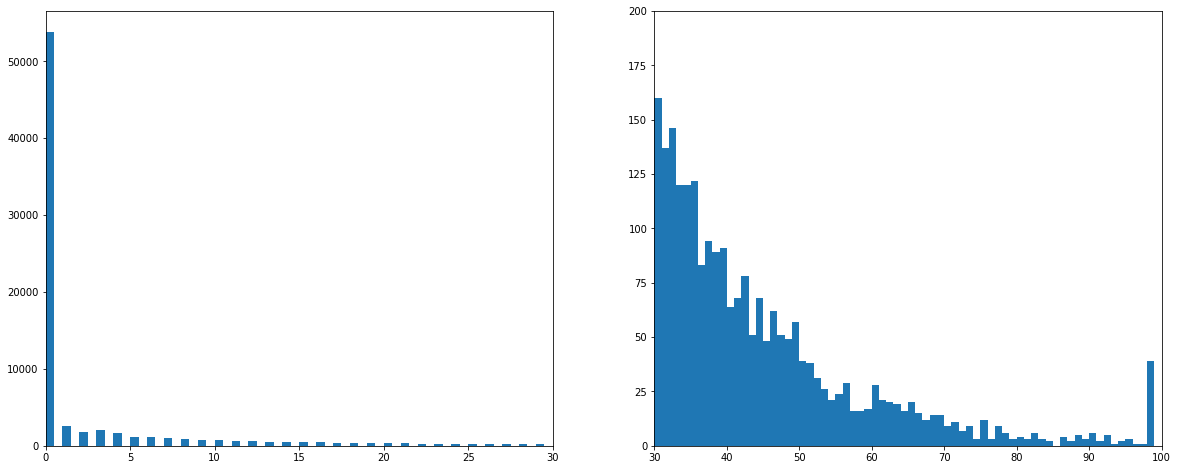

In [53]:
plt.figure(figsize = [20, 8])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, LoanDataClean['DelinquenciesLast7Years'].max()+1, 0.5) 
plt.hist(data = LoanDataClean, x = 'DelinquenciesLast7Years', bins = bin_edges); 
plt.xlim(0,30);

# histogram on right:
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, LoanDataClean['DelinquenciesLast7Years'].max()+1, 1) 
plt.hist(data = LoanDataClean, x = 'DelinquenciesLast7Years', bins = bin_edges); 
plt.ylim(0,200);
plt.xlim(30,LoanDataClean['DelinquenciesLast7Years'].max()+1);

> The distribution shows a massive spike in the number of occurrences for the value '0', and the remaining distribution is clearly skewed to the right. Worth noting a spike where the number of delinquencies is '99'

In [54]:
LoanDataClean['DelinquenciesLast7Years'].value_counts().head()

0.0    53848
1.0     2541
3.0     2027
2.0     1837
4.0     1610
Name: DelinquenciesLast7Years, dtype: int64

In [55]:
# % of "0 delinquencies" over all the dataset
len(LoanDataClean.query('DelinquenciesLast7Years == 0'))/len(LoanDataClean['DelinquenciesLast7Years'])

0.7015660421606692

### Plot 'Recommendations' in a histogram

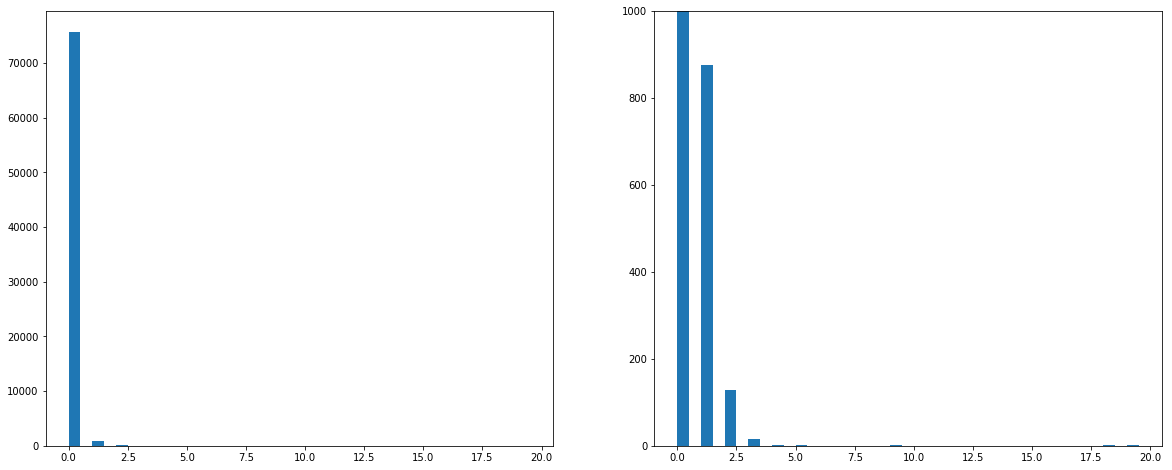

In [56]:
plt.figure(figsize = [20, 8])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, LoanDataClean['Recommendations'].max()+1, 0.5) 
plt.hist(data = LoanDataClean, x = 'Recommendations', bins = bin_edges);  

# histogram on right: zoomed at a lower frequency
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, LoanDataClean['Recommendations'].max()+1, 0.5) 
plt.hist(data = LoanDataClean, x = 'Recommendations', bins = bin_edges); 
plt.ylim(0,1000);

In [57]:
# % of "0 Recommendations" over all the dataset
len(LoanDataClean.query('Recommendations == 0'))/len(LoanDataClean['Recommendations'])

0.986606561221565

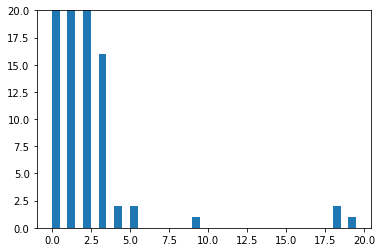

In [58]:
bin_edges = np.arange(0, LoanDataClean['Recommendations'].max()+1, 0.5) 
plt.hist(data = LoanDataClean, x = 'Recommendations', bins = bin_edges); 
plt.ylim(0,20);

> From the histograms we can see that by far, the most frequent situation is when there is no recommendations at all. There are few outliers with more then 9 recommendations.

### Findings about the distributions of our variables of interest, including unusual points and needed transformations

> "**ProsperRating (numeric)**": The distribution looked normal-shaped, with most frequent values between 3 and 6. No need to perform any transformation
>
> "**BorrowerRate**": We performed a log-normal transformation, which showed that the overall distribution looks normal, with highest frequency at around 0.2, but with a big "unepected" spike at round 0.32
>
> "**LoanStatus**": The nature of the data itself (qualitative variable) doesn't require transformation. I thought the nature of this variable would be safe to be assumed ordinal, so I ordered the values from worst (defaulted) to best (completed). It was evident that the highest frequency is for the status "Current", then "Completed and "Chargedoff". The other values have a much smaller frequency, which required to "zoom" in the chart to see the related columns. To investigate how good is the risk evaluation of the company, we would need to exclude the values "Current", as the outcome is still unknown, and only evaluate the remaining data against the "ProsperRating (numeric)", expecting more completed loans from higher scored borrowers and more defaulted, chargedoff and past due from lower scored borrowers.

### Analysis of the features investigated, including unusual distributions, data cleaning/tifying

> "**DebtToIncomeRatio**": On a linear scale, the vast majority of the datapoints lied in the extreme left, between 0 and 0.6. A spike around 10 was appreciable only after zooming on the right of the chart, due to the fact that this variable is capped at 10.01. Rescaling the values on a log-normal scale, the distribution looked perfectly normal, with max frequency at the value of 0.2
>
> "**StatedMonthlyIncome**": On a linear scale, the vast majority of the datapoints were condensed in the range 0 - 15000, well below the maximum, which is "483333". After performing the log-normal transformation, the distribution looked perfectly normal, with highest frequency at around 4500. Are considered outliers the datapoints higher then 60000 and also the ones smaller then 300.
>
> "**IncomeVerifiable**": The vast majority (99.94%) of the values is "True". No transofrmation needed here.
>
> "**Term**": Out of the three values listed, 36 months is the most frequent one, followed by 60 months, and finally 12 months as the least frequent term. No transofrmation needed here.
>
> "**EmploymentStatus**": I assumed an ordinal nature for this qualitative variable, therefore I sorted it in order of decreasing risk, where "Not Employed" is associated with the highest risk (as if a borrower has no steady sources of income is less likely that can pay the debt back) and "Employed" is assocuated with the lowest risk (as the borrower would have a steady source of income).
>
> "**EmploymentStatusDuration**": On a linear scale, the distribution of the employment status duration in months was skewed to the right, with the first bin having the maximum frequency. After the log-normal transformation, we could see that the distribution became slightly skewed to the left, with highest frequency between 50 and 200.
>
> "**AmountDelinquent**": On a linear scale, the distribution distribution of the amount delinquent is skewed to the right, with the datapoints in the first bin (range 0 - 1000) being by far the most frequent. After performing the log-normal transformation, the distribution looks normal, with the highest frequency in the range 80 - 20000​.
>
> "**DelinquenciesLast7Years**": We could see from the histogram that the distribution is skewed to the right and the vast majority (70%) of the records have 0 delinquncies in the last 7 years. No need for a log transformation here, as all the values are in a range that span in just 2 orders of magnitude.
>
> "**Recommendations**": From the histograms we could see that the most frequent situation (98.66%) is when there are no recommendations at all. There are few outliers with more then 9 recommendations

## Bivariate Exploration

In [59]:
# To analyse how good is the risk evaluation of the company, it will be useful to analyse their estimation for
# each loan ("ProsperRating (numeric)" and "BorrowerRate"), compared to the outcome of each loan, but we will have to 
# analyze only the loans with a conclusive outcome (eg. "Completed", "Defaulted", "Past Due",..), thus we will
# need to remove the "Current" status, as its outcome is still uncertain.

LoanDataClean['LoanStatus'].value_counts()

Current                   51702
Completed                 17688
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        716
Past Due (31-60 days)       325
Past Due (91-120 days)      277
Past Due (61-90 days)       274
Past Due (16-30 days)       242
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

In [60]:
# Create a new dataframe, specifically for this purpose, with all the loan having "Current" status removed
LoanDataOutcome = LoanDataClean.query('LoanStatus != "Current"')
LoanDataOutcome['LoanStatus'].value_counts()

Completed                 17688
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        716
Past Due (31-60 days)       325
Past Due (91-120 days)      277
Past Due (61-90 days)       274
Past Due (16-30 days)       242
FinalPaymentInProgress      187
Past Due (>120 days)         14
Current                       0
Name: LoanStatus, dtype: int64

In [61]:
# re-order the sequence of the loan statuses, leaving "Current" out
level_order = ['Defaulted','Chargedoff','Past Due (>120 days)','Past Due (91-120 days)','Past Due (61-90 days)','Past Due (31-60 days)','Past Due (16-30 days)','Past Due (1-15 days)','FinalPaymentInProgress','Completed']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
LoanDataOutcome['LoanStatus'] = LoanDataOutcome['LoanStatus'].astype(ordered_cat)

C:\Users\Fede\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Let's explore first the relation that, in my opinion, is the most important one, as it's what determines how successful the risk evaluation model of the company is: the relation between 'ProsperRating (numeric)' and the 'LoanStatus'

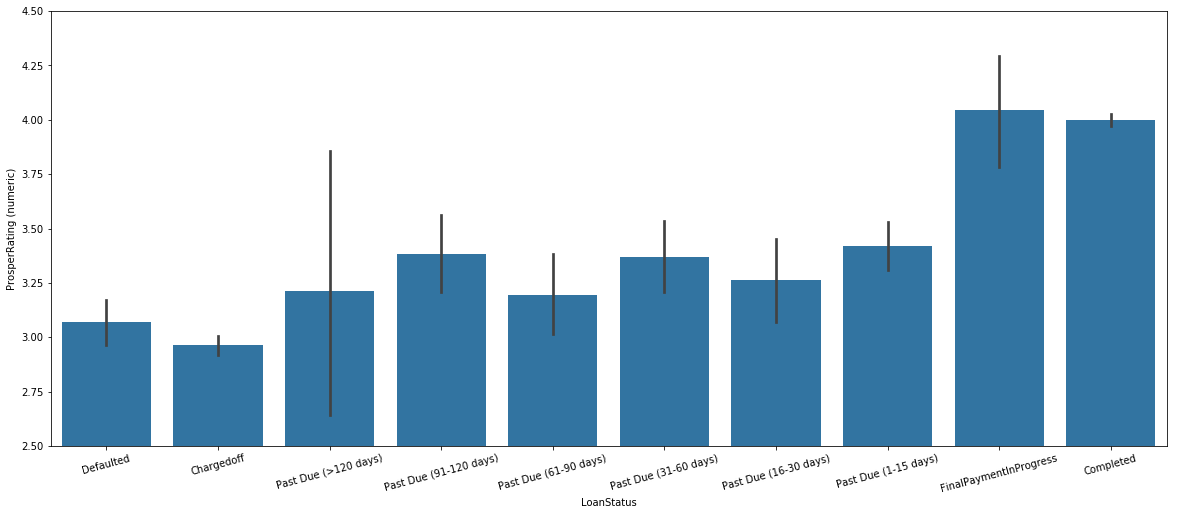

In [62]:
# I believe a cluster barchart is appropriate in this situation, to describe how the score (quantitative variable) 
# relates to the different outcomes of the loans

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcome, x = 'LoanStatus', y = 'ProsperRating (numeric)', color =base_color)
plt.xticks(rotation = 15); 
plt.ylim(2.5,4.5);

> Although I expected a clearer and stronger pattern, we can still see that the "Completed" and "FinalPaymentInProgress" statuses (statuses with positive outcome) show the highest average rating with low variation. The lowest rating are shown by the "Defaulted" and "Chargedoff" statuses (statuses with negative outcome). Finally an intermediate rating is shown by the "Past Due" statuses, representing the uncertainty of their outcome. Overall the risk estimation model is able to discriminate the borrowers that will be able to pay the debit back and the ones that won't, although not in an extremely efficient way.

### Another aspect very important for the business model is making sure that a higher risk is rewarded by a higher  interest. I believe it's appropriate to visualize the relation between "ProsperRating (numeric)" and the "BorrowerRate" with a barchart with the mean borrower rate (quantitative), and the score on the X-axis as it's quantitative but discrete.

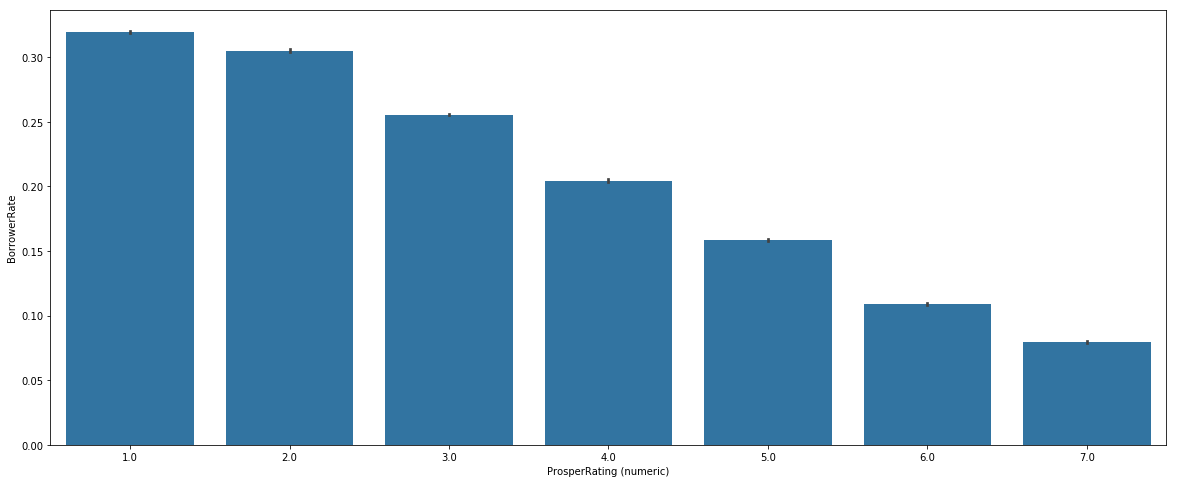

In [63]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcome, x = 'ProsperRating (numeric)', y = 'BorrowerRate', color =base_color) # data without "Current" status

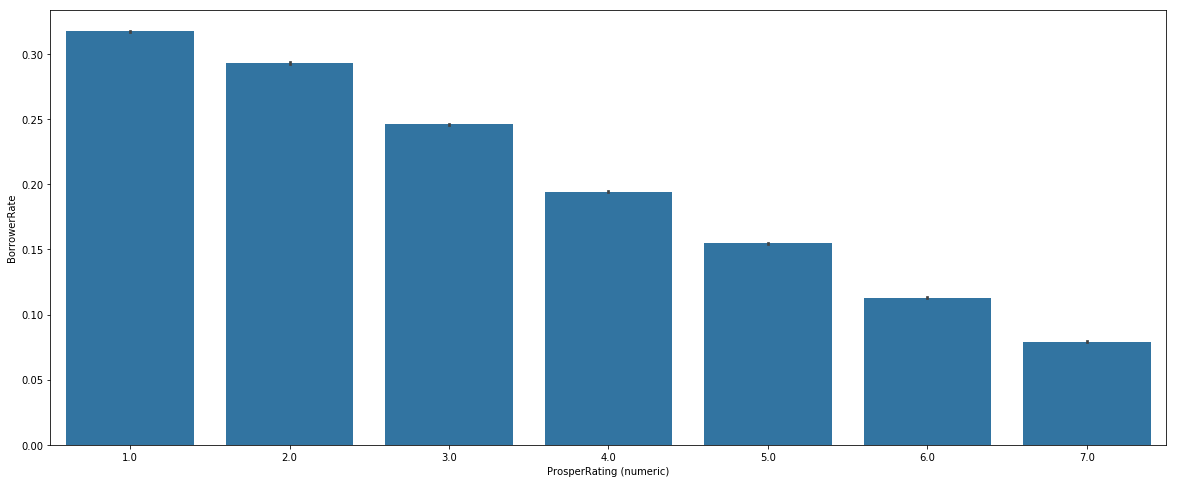

In [64]:
# data with "Current" status, as a confirmation of the pattern
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataClean, x = 'ProsperRating (numeric)', y = 'BorrowerRate', color =base_color)

> As expected, as the rating increases (less risky borrower), the interest rate decreases (for both datasets: with and without "Current" status).

### Let's investigate how the Borrower Rate relates to the Loan Status

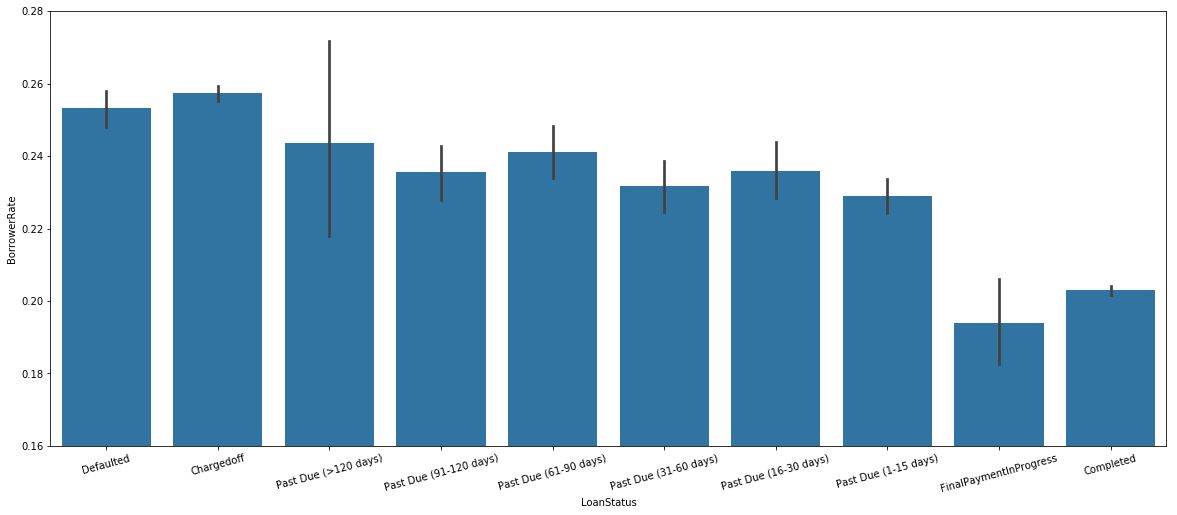

In [65]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcome, x = 'LoanStatus', y = 'BorrowerRate', color =base_color)
plt.xticks(rotation = 15);
plt.ylim(0.16,0.28);

> Overall the expected pattern is met: the borrower rate was higher for the borrowers who then had a negative outcome for their loan, and lower for the ones who had a positive outcome. However, this pattern is not dramatically strong, for example the "Defaulted" status has borrower rate slightly lower then "Chargedoff" status.

### Let's investigate now how the Income affects the Rating and the Borrower Rate

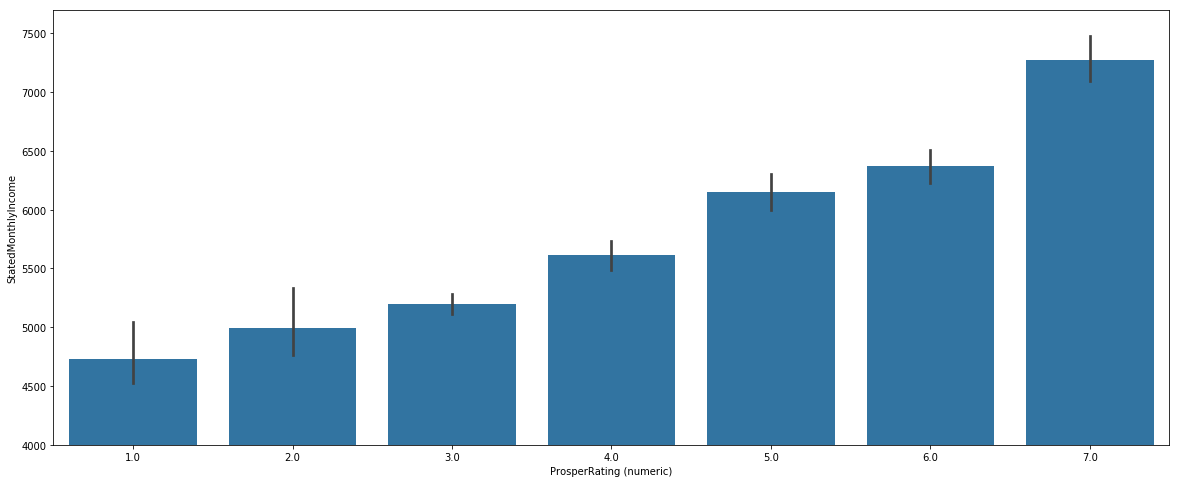

In [66]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcome, x = 'ProsperRating (numeric)', y = 'StatedMonthlyIncome', color =base_color)
plt.ylim(4000,7700);

> As we can see from the chart, there is a clear pattern where the higher is the monthly Income, the higher is the Rating, which makes sense as a higher Income would make it easier for the borrower to pay the debt back.

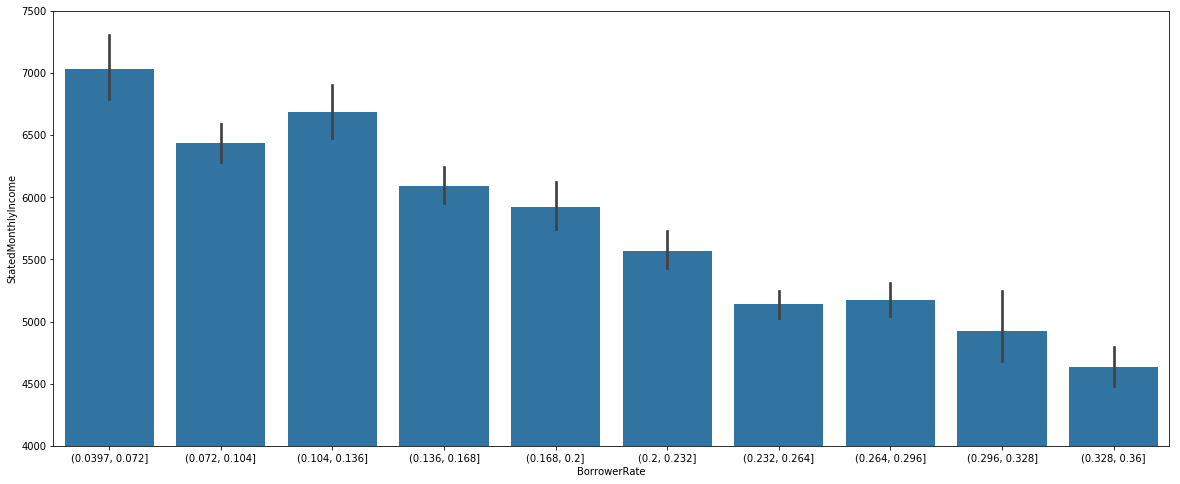

In [67]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = pd.cut(LoanDataOutcome.BorrowerRate, 10), y = LoanDataOutcome.StatedMonthlyIncome, color =base_color);
plt.ylim(4000,7500); 

> Here too is clear how a decreasing income would increase the borrower rate.

### Let's investigate how having the Income verified affects the Rating

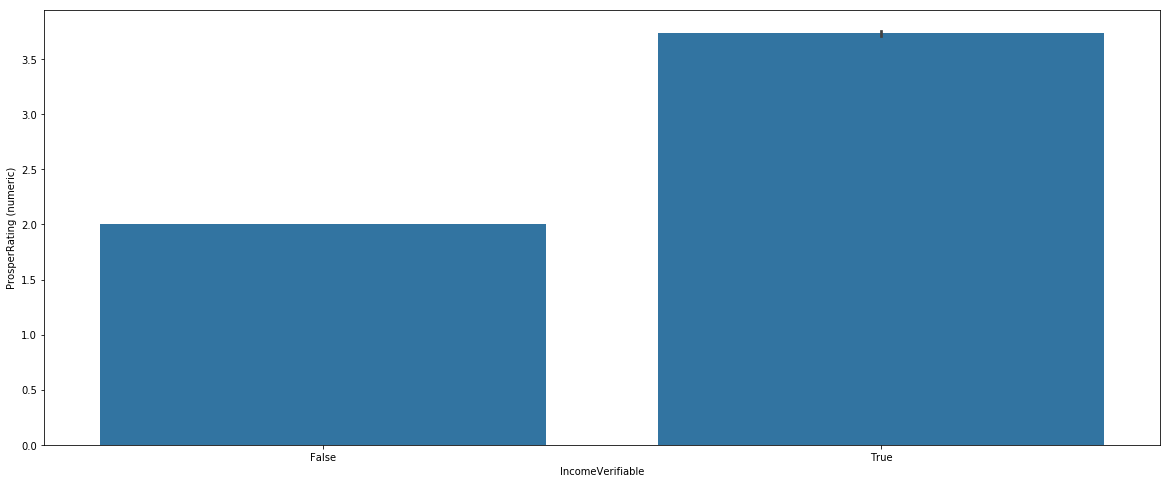

In [68]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcome, x = 'IncomeVerifiable', y = 'ProsperRating (numeric)', color =base_color)

In [69]:
len(LoanDataOutcome.query('IncomeVerifiable == True'))/len(LoanDataOutcome)

0.9999600830273032

> Despite the Rating would appear strongly influenced by the income verification status (higher rating when income is verified), I believe we shouldn't consider this metric in the core of the risk evaluation model, but just as an additional feature, considering the extremely low percentage of the "False" value for the "IncomeVerifiable" variable.

### It's interesting also to investigate how the "debt/income" ratio affects the Rating. I believe the higher this ratio is, the lower is the Rating because the borrower would have more issues to pay the due back if the debt is high and the income is low.

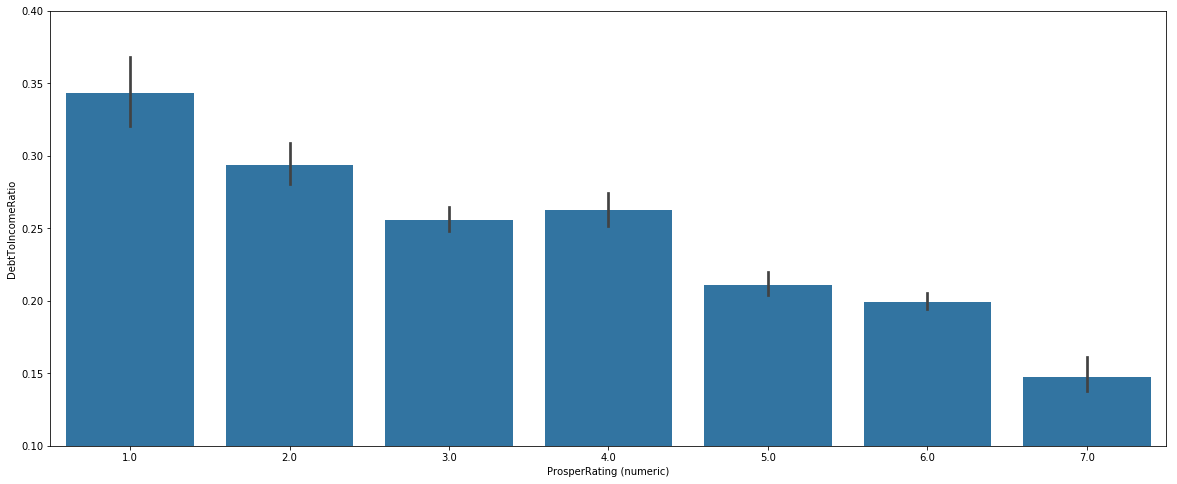

In [70]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcome, x = 'ProsperRating (numeric)', y = 'DebtToIncomeRatio', color =base_color)
plt.ylim(0.1,0.4);

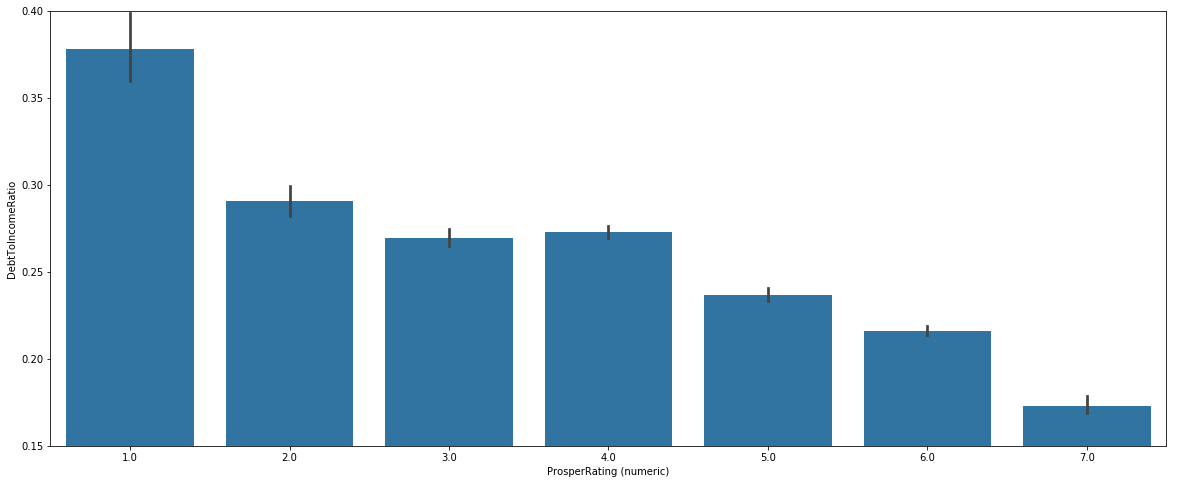

In [71]:
# including "Current" Status as a confirmation of the pattern
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataClean, x = 'ProsperRating (numeric)', y = 'DebtToIncomeRatio', color =base_color) 
plt.ylim(0.15,0.4);

> As expected, as the Rating increases (less risky borrower), the ratio "debt/income" decreases (for both datasets: with and without "Current" status).

### Let's investigate how the debt/income ratio relates to the borrower rate

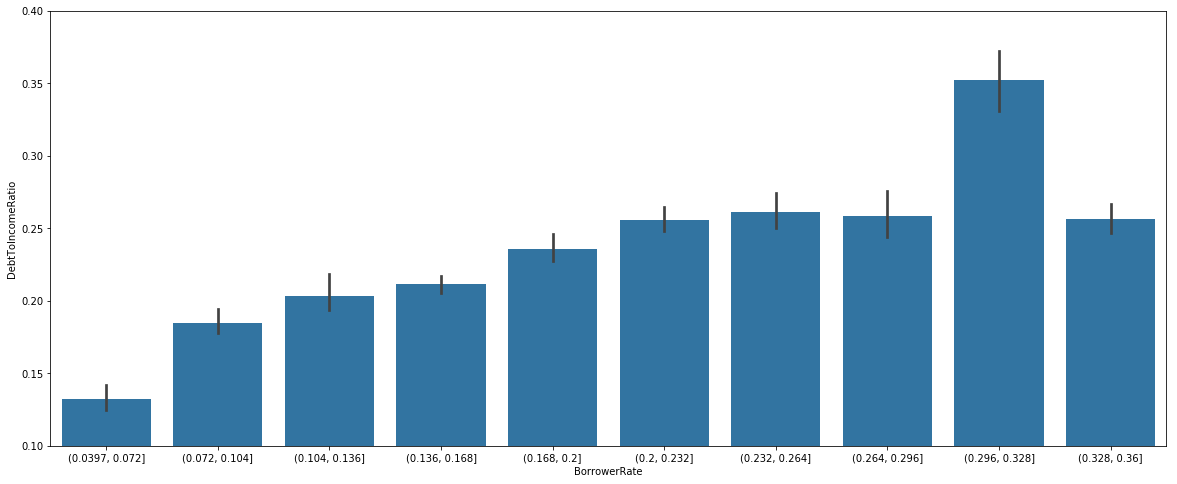

In [72]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = pd.cut(LoanDataOutcome.BorrowerRate, 10), y = LoanDataOutcome.DebtToIncomeRatio, color =base_color);
plt.ylim(0.1,0.4); 

> From the chart, we can see that the patter that we were expecting, which is the borrower rate increases as the debt/income ratio increases, is somehow met, although I would have expected a stronger correlation between the two variables.

### Let's investigate how the debt/income ratio affects the Loan Status: we would expect that the higher is the ratio the less likely is that the outcome of the loan is positive because il less likely that the borrower will be able to pay the debt back

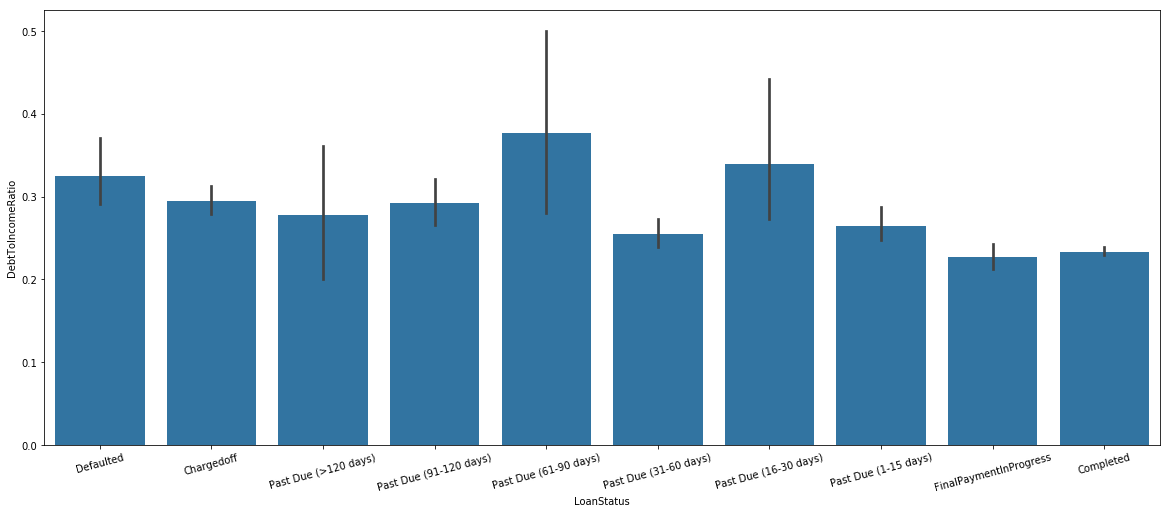

In [73]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcome, x = 'LoanStatus', y = 'DebtToIncomeRatio', color =base_color)
plt.xticks(rotation = 15); 

> From the chart, we can see that the patter that we were expecting is not perfectly met. we can see indeed that the positive outcomes ("FinalPaymentInProgerss" and "Completed") are the ones with the lowest ratio, and compared to those two statuses, the other two negative statuses ("Defaulted" and "Chargedoff") have a clearly higher ratio. However there is a lot of noise for the different "Past Due" statuses in the middle.

### Let's investigate how the 'Term' of the loan relates to the rating and the Borrower Rate

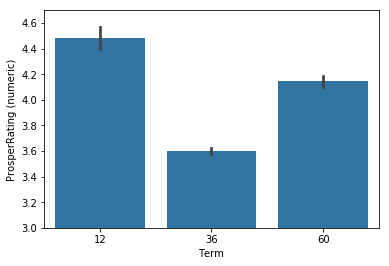

In [74]:
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcome, x = 'Term', y = 'ProsperRating (numeric)', color =base_color)
plt.ylim(3,4.7);

> The shortest term (12 months), as expected, is the one with highest rating. But then we can observe that the longest term (60 months) has a higher rating then the middle term (36 months). This invalidates the initial assumption.

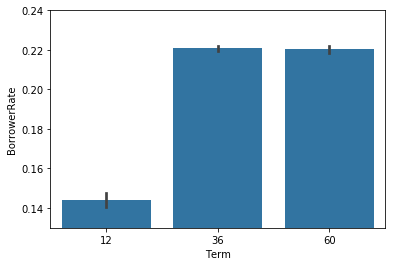

In [75]:
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcome, x = 'Term', y = 'BorrowerRate', color =base_color)
plt.ylim(0.13,0.24);

> A similar pattern is observed in the Borrower Rate vs Term chart: The shortest term (12 months), as expected, is the one with lowest borrower rate. But the middle and longest tarms have almost exactly the same borrower rate.

> Overall I wouldn't consider the "Term" as a key feature in the risk evaluation model.

### Let's investigate how the Rating relates to the Employment Status.

In [76]:
LoanDataClean['EmploymentStatus'].value_counts()

Employed         65159
Full-time         7577
Other             3456
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

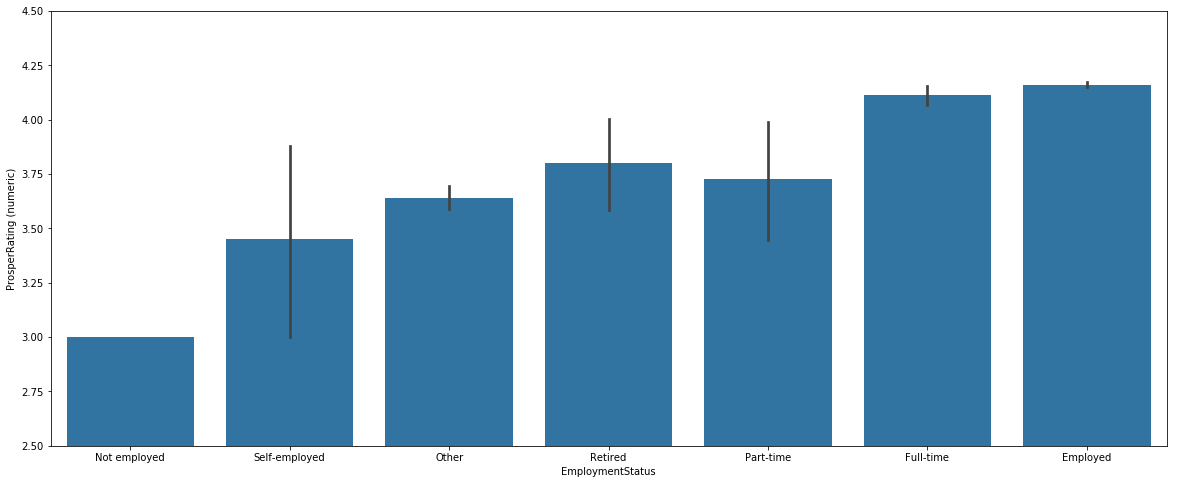

In [77]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataClean, x = 'EmploymentStatus', y = 'ProsperRating (numeric)', color =base_color)
plt.ylim(2.5,4.5);

In [78]:
LoanDataOutcome['EmploymentStatus'].value_counts()

Employed         17546
Full-time         6323
Other              759
Retired            242
Part-time          180
Self-employed        1
Not employed         1
Name: EmploymentStatus, dtype: int64

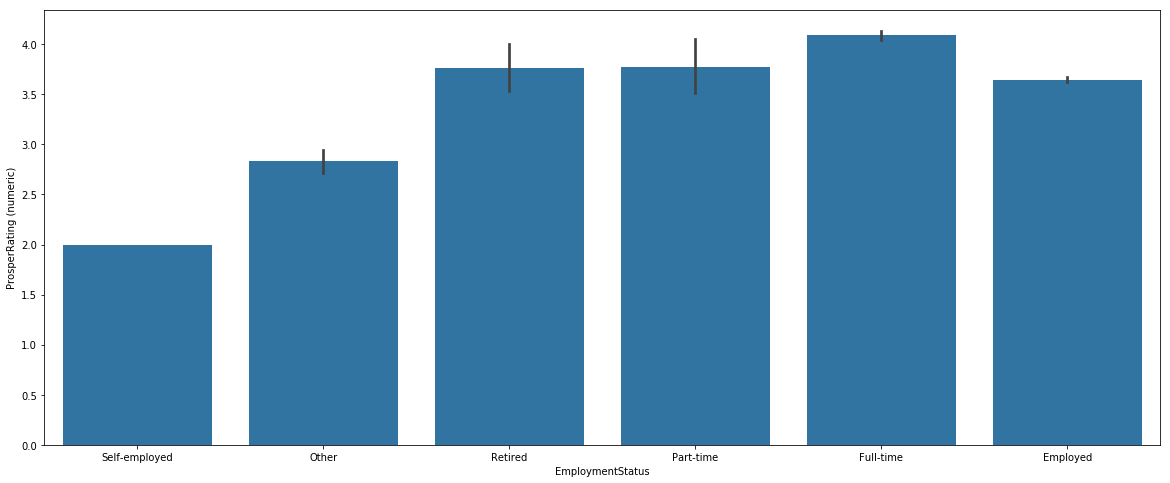

In [79]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcome, x = 'EmploymentStatus', y = 'ProsperRating (numeric)', color =base_color)
plt.xlim(.5,6.5);

> Considering that the "Not employed" status has got only one record, I excluded it from the chart as I wouldn't consider it statistically significant. From the chart I think it's safe to assume that the Rating increases if the borrower is employed by a company over if he is self-employed or retired (higher likelihood to have steady incomes), AND if the employee works full-time over if he works part-time (higher income).

### Let's investigate how the employment status impacts the loan status for the loans that have a clear outcome already (leaving "Current" status out)

In [80]:
# Let's create a new dataset without the datapoints for the employment statuses "Self-employed" and "Not employed",
# as there are not enough occurrences to make them meaningful
LoanDataOutcomeWONo_Self = LoanDataOutcome.query('EmploymentStatus != "Self-employed" and  EmploymentStatus != "Not employed"')

# Let's re-arrange the EmploymentStatus order, leavint the "Self-employed" and "Not employed" statuses out
level_order = ['Other','Retired','Part-time','Full-time','Employed']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
LoanDataOutcomeWONo_Self['EmploymentStatus'] = LoanDataOutcomeWONo_Self['EmploymentStatus'].astype(ordered_cat)

C:\Users\Fede\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
# Let's create a new dataset with the count of the datapoint for each combination of "EmploymentStatus" and  "LoanStatus"
ct_counts = LoanDataOutcomeWONo_Self.groupby(['EmploymentStatus', 'LoanStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', values = 'count')

In [82]:
# let's count the number of records for each employment status
emp_vc = LoanDataOutcomeWONo_Self.EmploymentStatus.value_counts()
emp_vc

Employed     17546
Full-time     6323
Other          759
Retired        242
Part-time      180
Name: EmploymentStatus, dtype: int64

In [83]:
# here we are calculating the adjusted LoanStatus frequencies for each emplyment status
adj = ct_counts/emp_vc

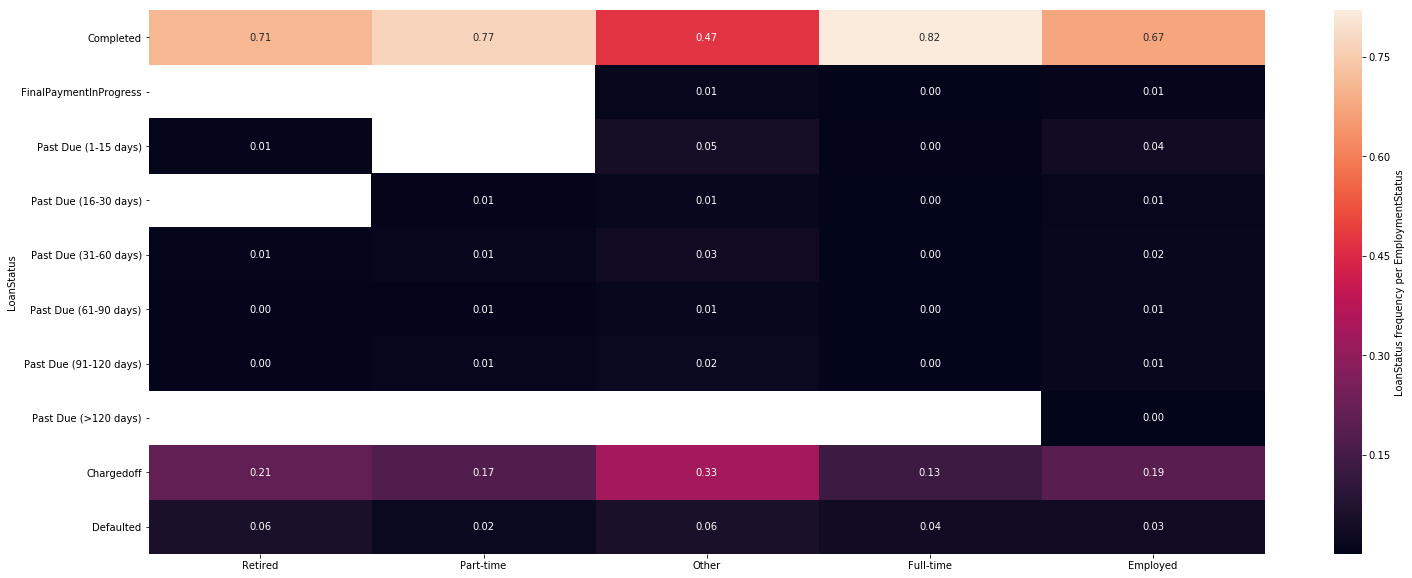

In [84]:
plt.figure(figsize = [25, 10])
ax=sns.heatmap(adj, annot = True, fmt = '.2f', cbar_kws = {'label' : 'LoanStatus frequency per EmploymentStatus'});      
ax.invert_xaxis()
ax.invert_yaxis()

> Here I expected a pattern where, as we were moving up on the vertical axis (from worse to better loan outcomes), the frequencies would have increased from the left to the right of the rows (from more risky employment statuses to more stable ones). Considering that the column "Other" should be the first on the left, although the predicted pattern is not very strong, I can see that the frequencies of the 2 rows with the most of the datapoints ("Chargedoff" and "Completed") appear to follow that pattern, as for "Chargedoff" the frequency gradually decreases moving to the right, while for "Completed" the frequency increases.

### Here below we are investigating how the Emplyment Status Duration impacts the Rating and the Loan Status

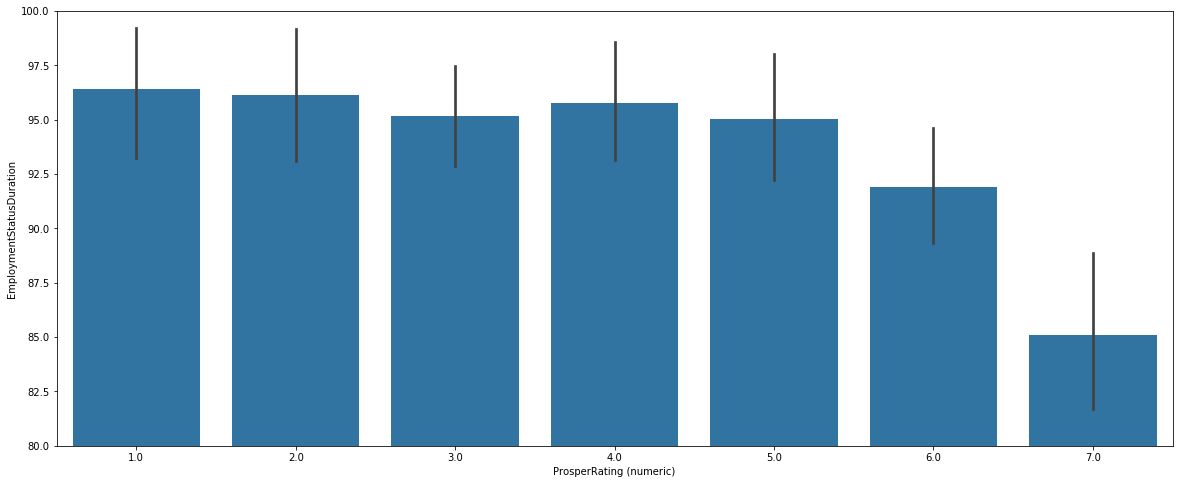

In [85]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcome, x = 'ProsperRating (numeric)', y = 'EmploymentStatusDuration', color = base_color)

plt.ylim(80,100);

In [86]:
LoanDataOutcome['ProsperRating (numeric)'].corr(LoanDataOutcome['EmploymentStatusDuration'])

-0.02521920369076272

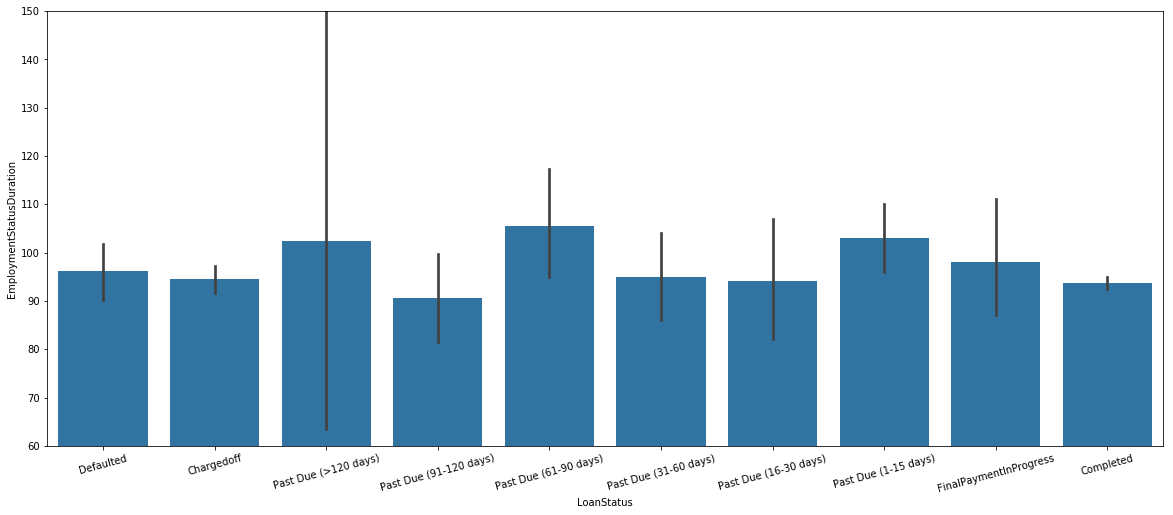

In [87]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcome, x = 'LoanStatus', y = 'EmploymentStatusDuration', color = base_color)
plt.ylim(60,150);
plt.xticks(rotation = 15);    

> Visually I can't see a clear pattern between the Rating and the duration of the employment status (This is also confirmed by the correlation coefficient being close to zero), as well as between the duration of the employment and the Loan status. 
Although from rating of 5 to rating of 7 I see a decreasing trend in the employment status duration, this trend goes against what we were expecting, therefore I woulnd't keep the 'EmploymentStatusDuration' as a factor for our risk evaluation model.

### Let's investigate now how the "AmountDelinquent" relates to the Rating and the Borrower Rate

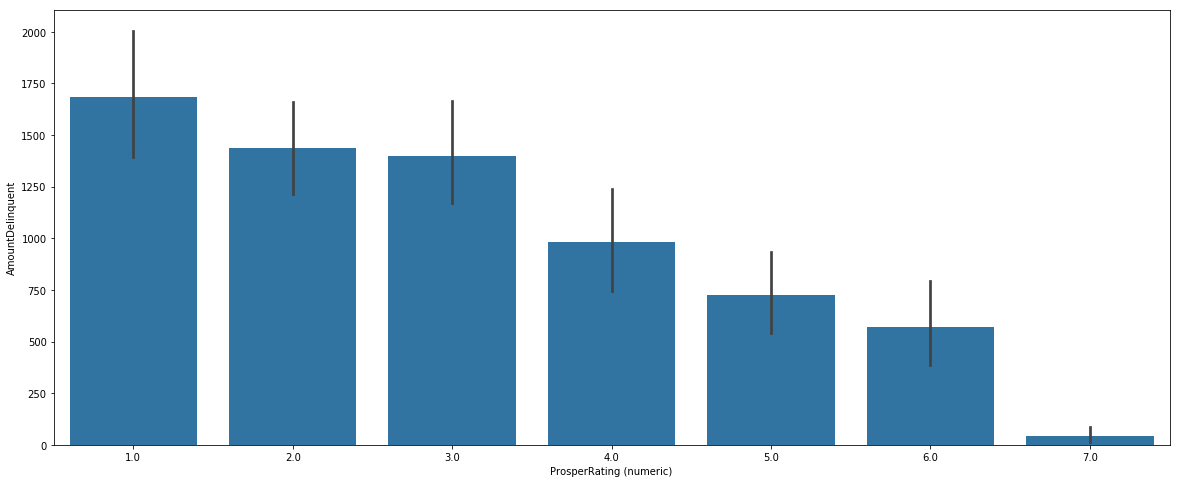

In [88]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcome, x = 'ProsperRating (numeric)', y = 'AmountDelinquent', color =base_color)

> As supposed, the higher is the amount delinquent, the lower is the Rating

C:\Users\Fede\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


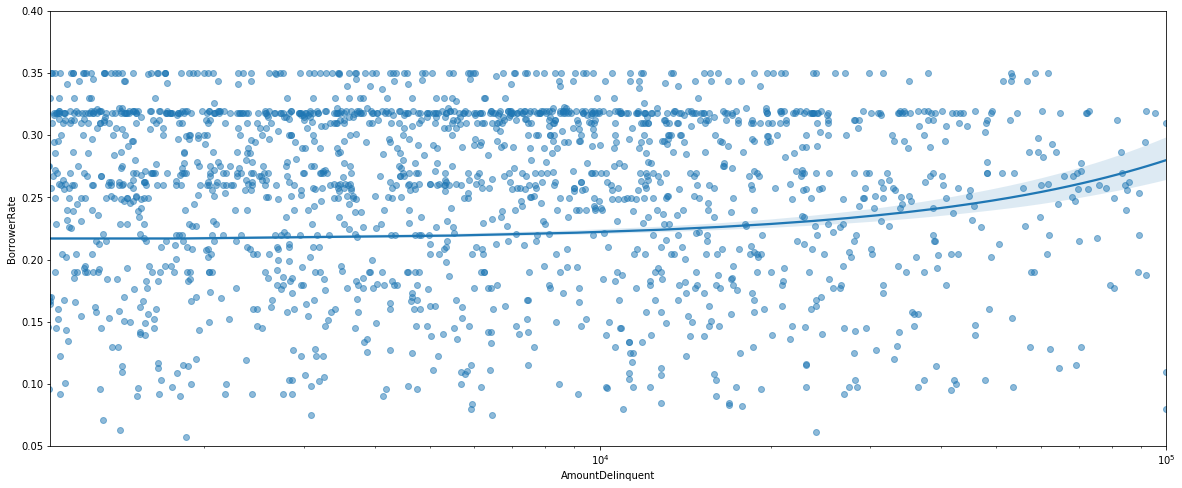

In [89]:
plt.figure(figsize = [20, 8])
sns.regplot(data = LoanDataOutcome, x= 'AmountDelinquent', y='BorrowerRate', scatter_kws = {'alpha' : 0.5} );
plt.xscale('log')
plt.xlim(0,100000);
plt.ylim(0.05,0.4);

> I cannot see any meaningful relation between the logarithm of the amount delinquent and the borrower rate

### Let's investigate now how the "DelinquenciesLast7Years" relates to the Rating

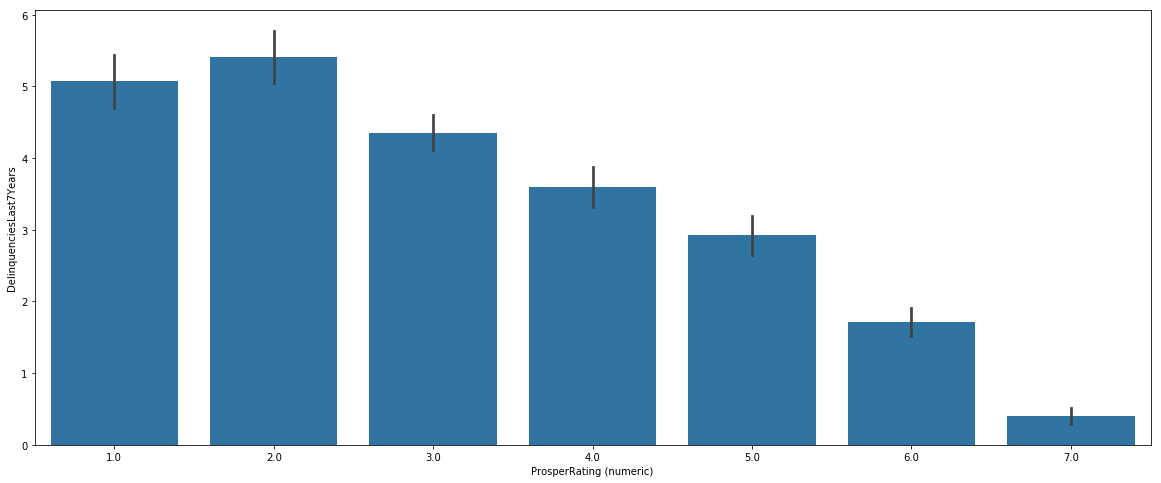

In [90]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcome, x = 'ProsperRating (numeric)', y = 'DelinquenciesLast7Years', color =base_color)

> As expected, the lower is the amount of delinquencies in the previous 7 years, the higher is the Rating, and vice versa.

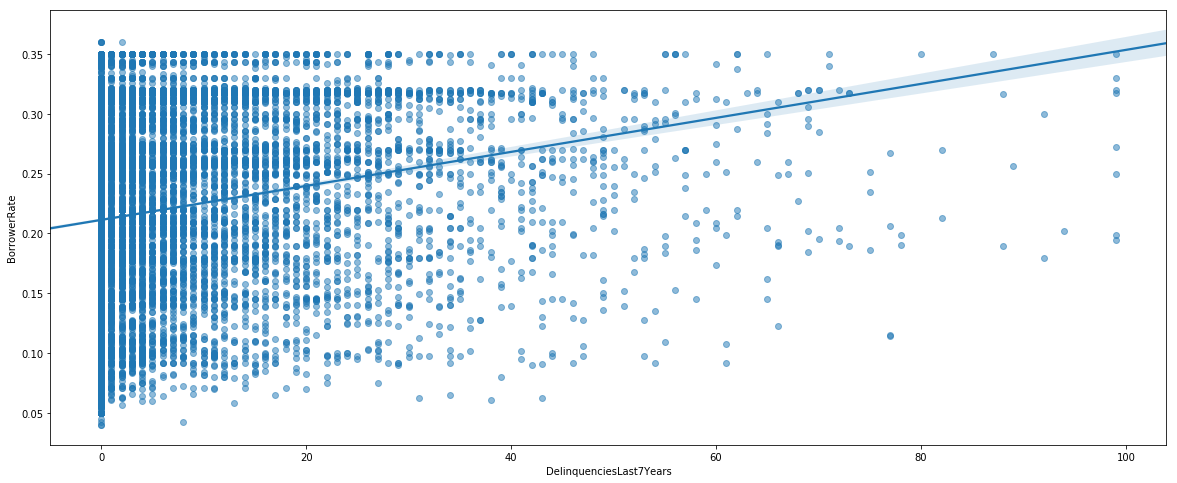

In [91]:
plt.figure(figsize = [20, 8])
sns.regplot(data = LoanDataOutcome, x= 'DelinquenciesLast7Years', y='BorrowerRate', fit_reg = True , scatter_kws = {'alpha' : 0.5} );

> I can see only a very weak positive correlation between the number of delinquencies in the last 7 years and the borrower rate

### Let's investigate now how the "Recommendations" relates to the Rating and Loan Status

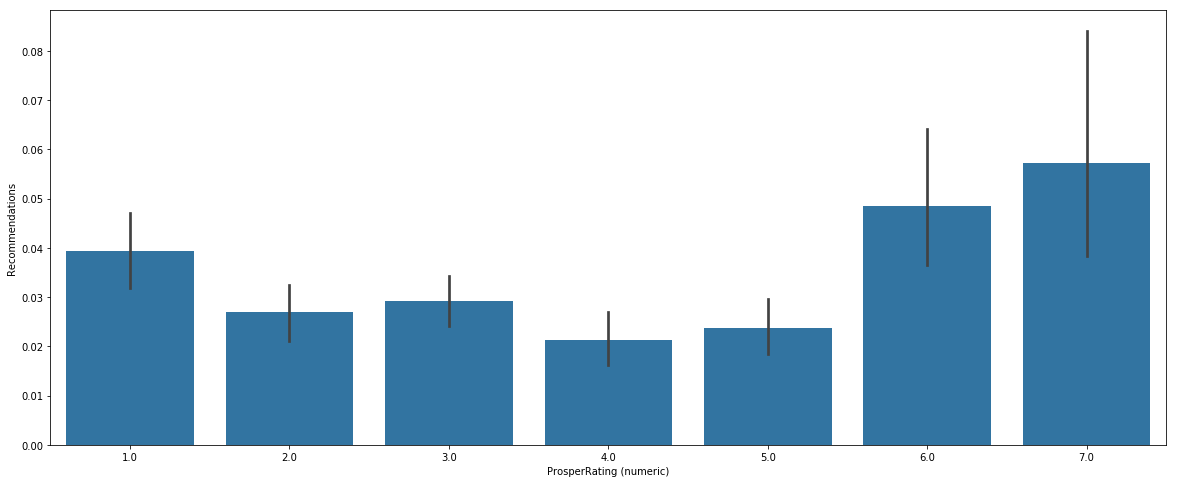

In [92]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcome, x = 'ProsperRating (numeric)', y = 'Recommendations', color =base_color)

In [93]:
LoanDataOutcome['Recommendations'].value_counts()

0     24390
1       558
2        86
3        12
4         2
18        2
9         1
5         1
Name: Recommendations, dtype: int64

In [94]:
LoanDataOutcome.query('Recommendations == 18')

,ProsperRating (numeric),BorrowerRate,LoanStatus,DebtToIncomeRatio,StatedMonthlyIncome,IncomeVerifiable,Term,EmploymentStatus,EmploymentStatusDuration,AmountDelinquent,DelinquenciesLast7Years,Recommendations
106650,7.0,0.0565,Completed,0.06,11899.25,True,12,Employed,265.0,0.0,0.0,18
111736,6.0,0.0929,Completed,0.07,11899.25,True,12,Employed,257.0,0.0,0.0,18


In [95]:
LoanDataOutcome.query('Recommendations == 9')

,ProsperRating (numeric),BorrowerRate,LoanStatus,DebtToIncomeRatio,StatedMonthlyIncome,IncomeVerifiable,Term,EmploymentStatus,EmploymentStatusDuration,AmountDelinquent,DelinquenciesLast7Years,Recommendations
94683,6.0,0.06,Completed,0.05,6065.916667,True,36,Full-time,152.0,0.0,0.0,9


The amount of "Zero recommendations" is so high that makes the detection of the effect of having recommendations too diluted to be perceived in the chart plotted from the original dataset. Therefore, we are going to create an ad-hoc dataset composed only by rows with #recommendations > 0

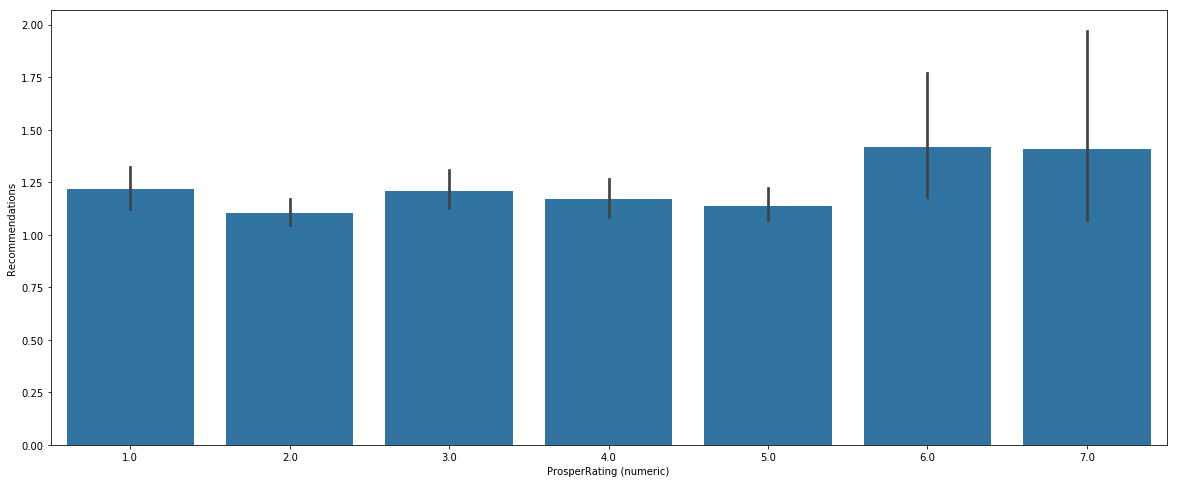

In [96]:
Recomm = LoanDataOutcome.query('Recommendations > 0')

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = Recomm, x = 'ProsperRating (numeric)', y = 'Recommendations', color =base_color)

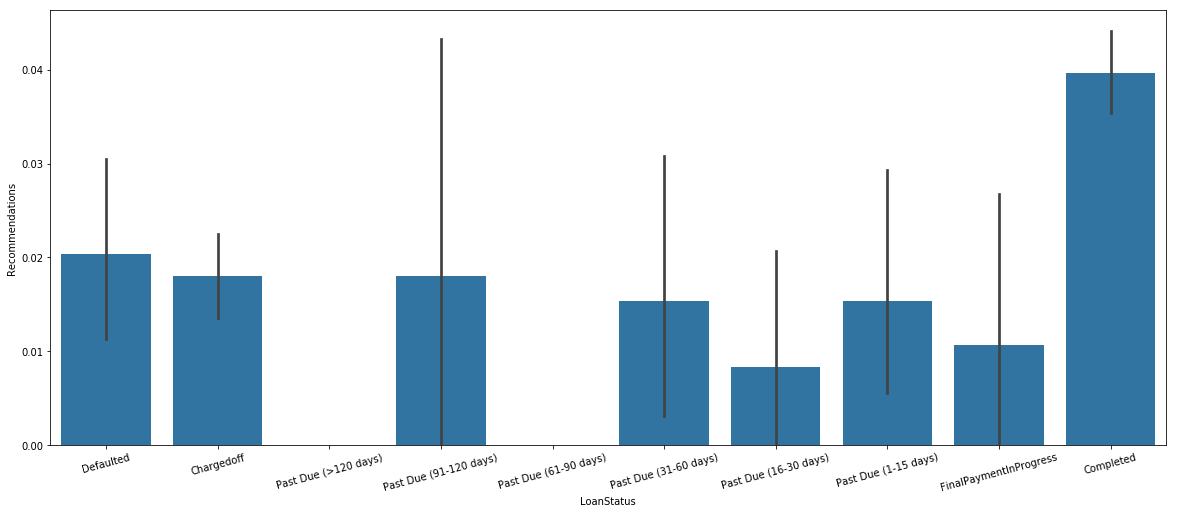

In [97]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcome, x = 'LoanStatus', y = 'Recommendations', color =base_color)
plt.xticks(rotation = 15); 

> Even after removing all the occurrences with no recommendations, despite we can clearly see that highest ratings (6 and 7) show a higher number of recommendations compared to the other scores, as well as the "Completed" status compared to the other loan statuses, I believe the pattern is not consistent enough to consider this parameter useful for the risk evaluation.

### Let's investigate the relationship between the monthly Income and the debt/income ratio

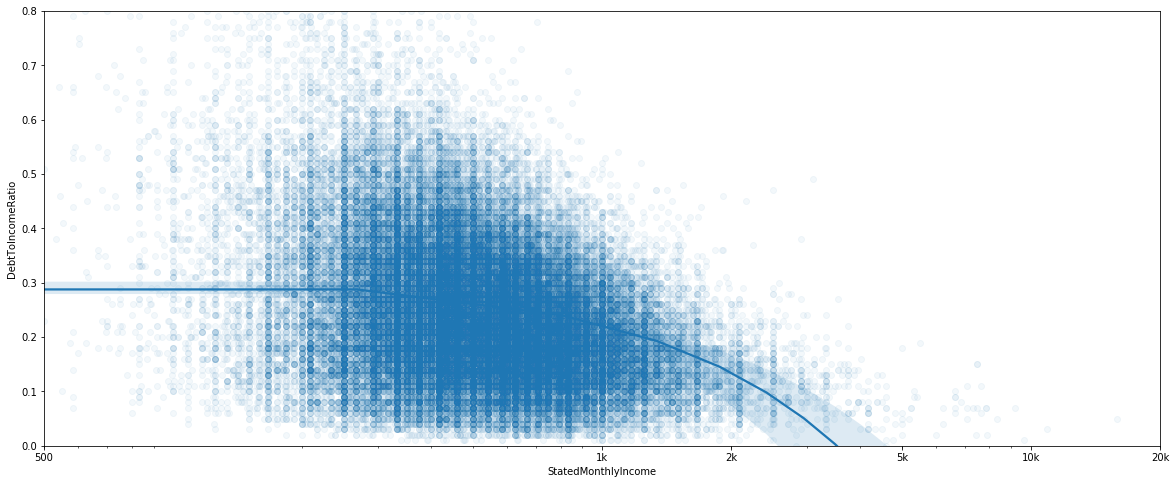

In [98]:
plt.figure(figsize = [20, 8])

sns.regplot(data = LoanDataClean, x= 'StatedMonthlyIncome', y='DebtToIncomeRatio', fit_reg = True , x_jitter= 0, y_jitter= 0, scatter_kws = {'alpha' : 0.05} );

plt.xscale('log')
plt.xlim(10e2,20e4);
plt.ylim(0,0.8);

plt.xticks([500, 10e3, 20e3, 50e3, 10e4, 20e4], [500, '1k', '2k', '5k', '10k', '20k']);

> It appears that there is a linear relation between the logarithm of the monthly income and the debt/income ratio. However the correlation appears to be very weak.

### Let's investigate the relationship between the debt/income ratio and the Borrower Rate

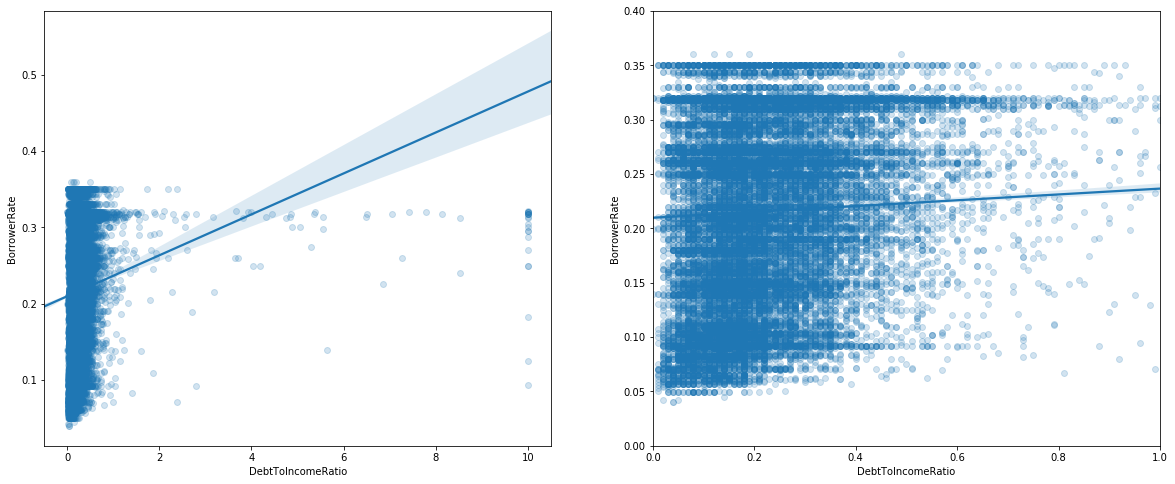

In [99]:
plt.figure(figsize = [20, 8])

# histogram on left: full data
plt.subplot(1, 2, 1)
sns.regplot(data = LoanDataOutcome, x= 'DebtToIncomeRatio', y='BorrowerRate', fit_reg = True , scatter_kws = {'alpha' : 0.2} );


# histogram on right: zoomed in the 'DebtToIncomeRatio' most populated zone
plt.subplot(1, 2, 2)
sns.regplot(data = LoanDataOutcome, x= 'DebtToIncomeRatio', y='BorrowerRate', fit_reg = True , scatter_kws = {'alpha' : 0.2} );
plt.xlim(0,1);
plt.ylim(0,0.4);

> It appears that there is a very weak positive correlation between the debt/income ratio and the borrower rate.

### Let's investigate the relationship between the debt/income ratio and the amount delinquent

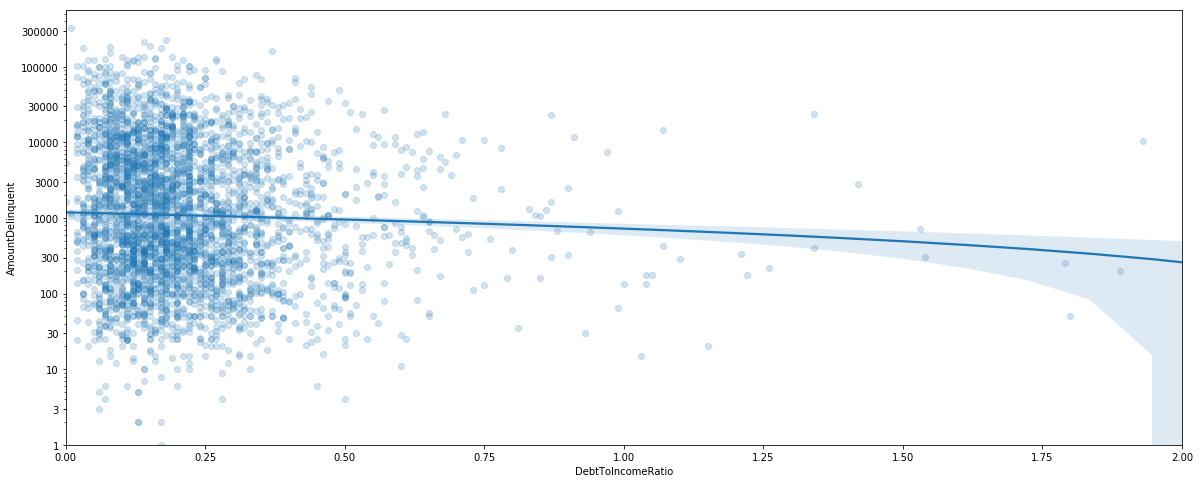

In [100]:
plt.figure(figsize = [20, 8])

sns.regplot(data = LoanDataOutcome, x= 'DebtToIncomeRatio', y='AmountDelinquent', fit_reg = True , scatter_kws = {'alpha' : 0.2} );

plt.yscale('log')
plt.xlim(0,2);

tick_locs = [1,3,10,30,100,300,1000,3000,10000,30000,100000,300000]
plt.yticks(tick_locs, tick_locs); 

> It appears that there is a linear relation between the debt/income ratio and the logarithm of the amount delinquent. However it appears there is no correlation.

### Let's investigate the relationship between the debt/income ratio and the number of delinquencies in the last 7 years

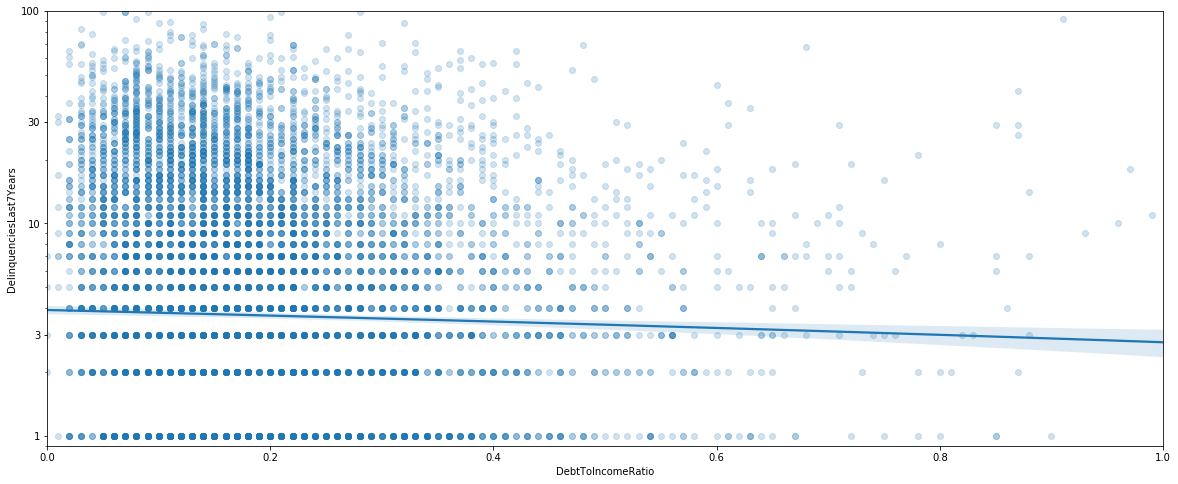

In [101]:
plt.figure(figsize = [20, 8])

sns.regplot(data = LoanDataOutcome, x= 'DebtToIncomeRatio', y='DelinquenciesLast7Years', fit_reg = True, scatter_kws = {'alpha' : 0.2} );

plt.yscale('log')
plt.xlim(0,1);
plt.ylim(0.9,2);

tick_locs = [1,3,10,30,100]
plt.yticks(tick_locs, tick_locs); 

> It appears that there is a linear relation between the debt/income ratio and the logarithm of the number of delinquencies in the last 7 years. However the negative correlation appears to be very weak.

### Let's investigate the relation between the number of delinquencies in the last 7 years and the amount delinquent

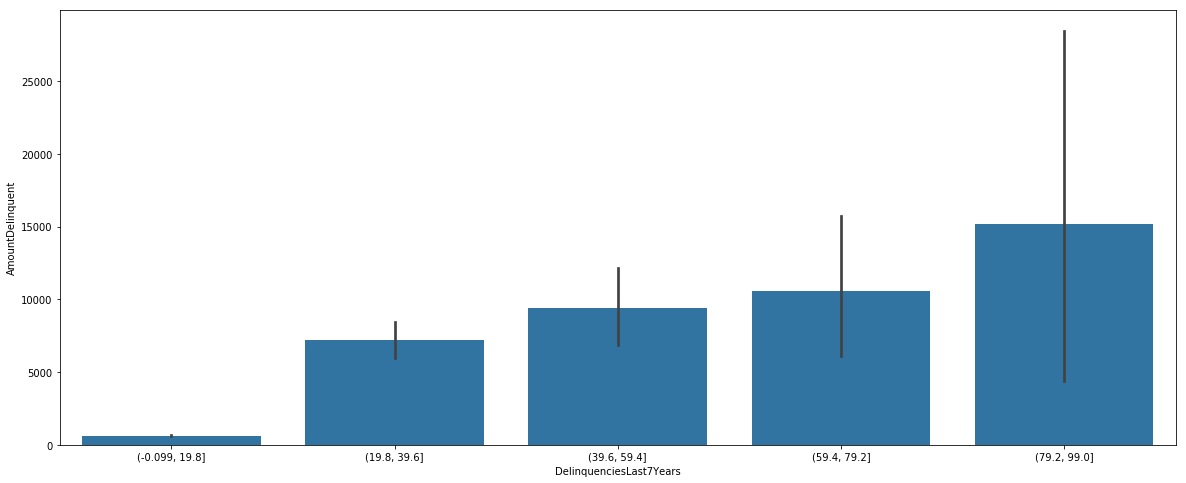

In [102]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = pd.cut(LoanDataOutcome.DelinquenciesLast7Years, 5), y = LoanDataOutcome.AmountDelinquent, color =base_color);

> As we can see from the cart, the higher the number of delinquencies in the last 7 years, the more likely that the amount delinquent is higher

### Main relations discovered between the three main features of interest:

> 1)	**'ProsperRating (numeric)'** vs **'LoanStatus'**: we can see the pattern, although not exceptionally strong, where the higher is the rating, the more positive is the outcome of the loan. 
>
> 2)	**'ProsperRating (numeric)'** vs **'BorrowerRate'**: we can see here a clear pattern where the lower is the rating, the higher is the borrower rate, in order to compensate the higher risk the company is exposed to.
>
> 3)	**'BorrowerRate'** vs **'LoanStatus'**: the borrower rate was higher for the borrowers who then had a negative outcome for their loan, and lower for the ones who had a positive outcome.




### Main meaningful relations between the features of interest and the other features of the dataset:

> 1)	**'StatedMonthlyIncome'** vs **'ProsperRating (numeric)'** & **'BorrowerRate'**: the correlation of the income is positive with the rating and negative with the borrower rate.
>
> 2)	**'DebtToIncomeRatio'** vs  **'ProsperRating (numeric)'** & **'BorrowerRate'**: the correlation of the debt/income ratio is negative with the rating and positive with the borrower rate.
>
> 3)	**'EmploymentStatus'** vs  **'ProsperRating (numeric)**': the rating increases if the borrower is employed by a company over if he is self-employed or retired, and if the employee works full-time over if he works part-time.
>
> 4)	**'AmountDelinquent'** vs **'DelinquenciesLast7Years'** vs **'ProsperRating (numeric)'**: the higher is the amount delinquent and the delinquencies in the previous seven years, the lower is the rating. Also, the higher the number of delinquencies, the higher is the amount delinquent.

## Multivariate Exploration

### Multivar Viz #1: Exploring how the Prosper Rating, the Borrower Rate and the Loan Status are related

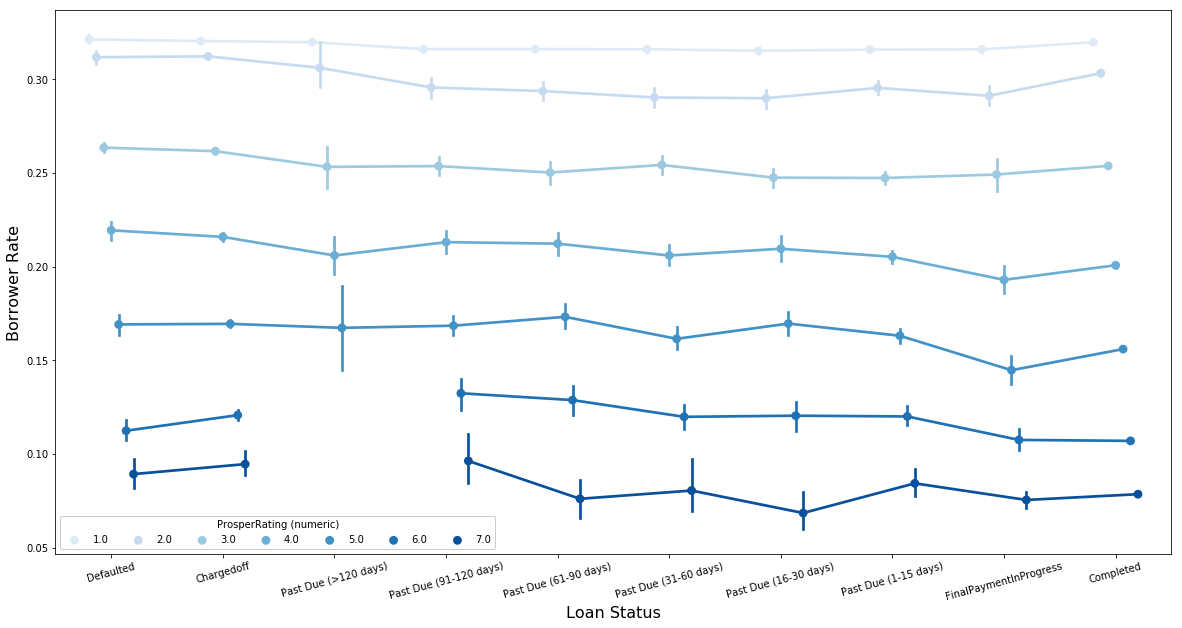

In [103]:
plt.figure(figsize = [20, 10])
ax = sns.pointplot(data = LoanDataOutcome, x = 'LoanStatus', y = 'BorrowerRate', hue = 'ProsperRating (numeric)', dodge = 0.4, linestyles = "-", palette = 'Blues');
ax.legend(loc = 3, ncol = 11, framealpha = 1, title = 'ProsperRating (numeric)');
plt.xticks(rotation = 15);
plt.xlabel('Loan Status', fontsize = 16);
plt.ylabel('Borrower Rate', fontsize = 16);

>  From the chart above, we can clearly see that there is a strong negative correlation between the Rating and the Borrower rate. There is also a lighter correlation, although less strong, between the borrower rate and the loan status, with borrower rate being higher for statuses with more negative outcome. 

### Multivar Viz #2: Exploring how the Prosper Rating, the Debt/Income Ratio and the Employment Status are related

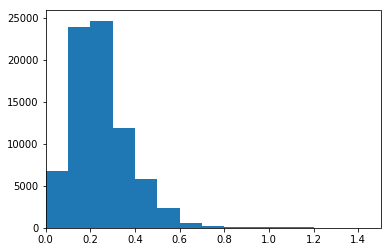

In [104]:
# Let's have a quick look again to the 'DebtToIncomeRatio' distribution, so that we can only capture the biggest part of the distribution
bin_edges = np.arange(0, LoanDataClean['DebtToIncomeRatio'].max()+1, 0.1)
plt.hist(data = LoanDataClean, x = 'DebtToIncomeRatio', bins = bin_edges); 
plt.xlim(0,1.5);

In [105]:
# Let's bin the variable 'DebtToIncomeRatio' so that we can use discrete values in the heatmap
bin_edges = np.arange(0, LoanDataClean['DebtToIncomeRatio'].max()+1, 0.1) # in incremental steps of 0.1
labels = np.arange(1, 111) # to the new column I'm going to assign labels from 1 to 111 to cover all the values
LoanDataOutcome['DebtToIncomeRatioDisc'] = pd.cut(LoanDataOutcome.DebtToIncomeRatio, bins = bin_edges, labels = labels)

LoanDataOutcome2 = LoanDataOutcome.query('DebtToIncomeRatioDisc <= 11') # create a new dataset without the outliers (roughly just the first 11 bins, according to the distribution shown above)

LoanDataOutcome2.head(10)

C:\Users\Fede\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,ProsperRating (numeric),BorrowerRate,LoanStatus,DebtToIncomeRatio,StatedMonthlyIncome,IncomeVerifiable,Term,EmploymentStatus,EmploymentStatusDuration,AmountDelinquent,DelinquenciesLast7Years,Recommendations,DebtToIncomeRatioDisc
12,5.0,0.1435,Past Due (1-15 days),0.18,2416.666667,True,36,Employed,1.0,0.0,0.0,0,2
15,1.0,0.3177,Defaulted,0.49,5500.000000,True,36,Other,121.0,0.0,0.0,0,5
23,3.0,0.2419,Defaulted,0.39,2500.000000,True,36,Employed,3.0,0.0,0.0,0,4
26,2.0,0.2809,Completed,0.11,3885.916667,True,60,Employed,25.0,0.0,0.0,0,2
27,6.0,0.0920,Completed,0.26,6666.666667,True,36,Full-time,10.0,0.0,0.0,0,3
30,6.0,0.0999,Completed,0.11,3750.000000,True,36,Employed,44.0,42488.0,10.0,0,2
33,7.0,0.0785,Completed,0.05,13083.333333,True,36,Employed,7.0,0.0,0.0,0,1
57,3.0,0.2552,Chargedoff,0.15,9166.666667,True,36,Employed,155.0,0.0,0.0,0,2
67,2.0,0.2669,Completed,0.28,4777.000000,True,12,Employed,70.0,0.0,0.0,0,3
72,3.0,0.2599,Completed,0.10,8333.333333,True,36,Employed,34.0,73.0,1.0,0,1


In [106]:
LoanDataOutcome2.EmploymentStatus.value_counts()

Employed         17456
Full-time         6302
Other              735
Retired            241
Part-time          172
Self-employed        1
Not employed         1
Name: EmploymentStatus, dtype: int64

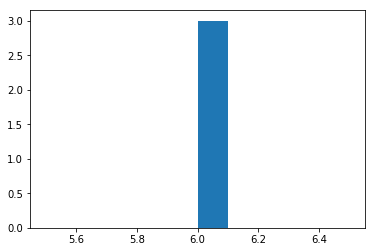

In [107]:
plt.hist(LoanDataOutcome2.query('EmploymentStatus=="Part-time" and DebtToIncomeRatio>=0.9')['ProsperRating (numeric)']);

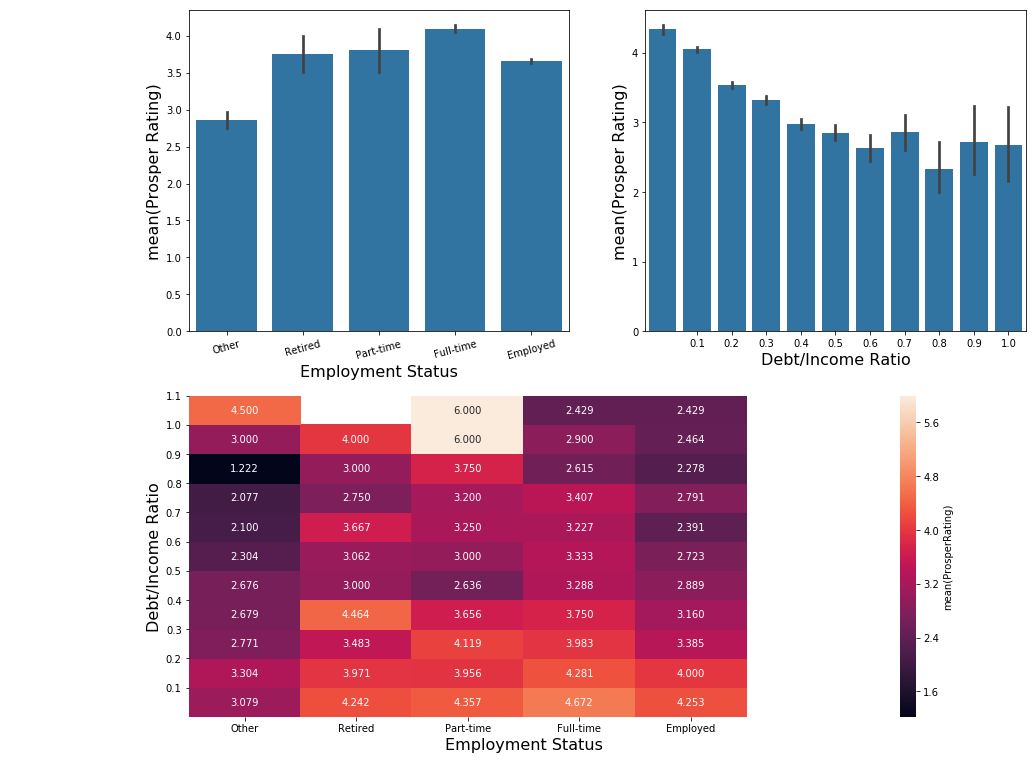

In [108]:
plt.figure(figsize = [15, 13])

base_color = sns.color_palette()[0]

# chart on top left
plt.subplot(2, 2, 1)
ax = sns.barplot(data = LoanDataOutcome2, x = 'EmploymentStatus', y = 'ProsperRating (numeric)', color =base_color)
plt.xlim(1.5,6.5);
plt.xticks(rotation = 15);
plt.xlabel('Employment Status', fontsize = 16);
plt.ylabel('mean(Prosper Rating)', fontsize = 16);

# chart on top right
plt.subplot(2, 2, 2)
#ax = sns.barplot(data = LoanDataOutcomeWONo_Self, x = 'ProsperRating (numeric)', y = 'DebtToIncomeRatio', color =base_color)
ax = sns.barplot(data = LoanDataOutcome2, x = 'DebtToIncomeRatioDisc', y = 'ProsperRating (numeric)', color =base_color)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1]);
plt.ylabel('mean(Prosper Rating)', fontsize = 16);
plt.xlabel('Debt/Income Ratio', fontsize = 16);
plt.xlim(-0.5,10.5);

# chart on bottom
plt.subplot(2, 1, 2)
cat_means = LoanDataOutcome2.groupby(['EmploymentStatus','DebtToIncomeRatioDisc']).mean()['ProsperRating (numeric)'] 
cat_means = cat_means.reset_index(name = 'ProsperRating (numeric)_avg')
cat_means = cat_means.pivot(index = 'DebtToIncomeRatioDisc', columns = 'EmploymentStatus', values = 'ProsperRating (numeric)_avg')
sns.heatmap(cat_means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'mean(ProsperRating)'});
plt.xlim(2,8);
plt.ylim(0,11);
plt.yticks([1,2,3,4,5,6,7,8,9,10,11], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1]);
plt.ylabel('Debt/Income Ratio', fontsize = 16);
plt.xlabel('Employment Status', fontsize = 16);

> Excluding the "Not employed" and "Self-employed" statuses, as they have only 1 occurrence each, thus not representative, we can see from the heat-map the overall pattern where the rating increases moving from top to bottom, which means as the debt/income ratio decreases. However this pattern becomes weaker for the top values of the debt/income ratio displayed (over 0.8).
It's worth mentioning that this patter is extremely consistent in the "Employed" status, and as the "Employed" status is the most frequent, it plays a big role in defining the overall pattern.
>
> Also as we move to the right along the "x" axis (which means from more unstable to more stable employment statuses), we can see an overall increase in the rating. 
In particular, the zone with the highest rating is for Retired, Part-timers, Full-timers and Employed up to a maximum of 0.2 debt/income ratio. 
Interesting to notice that the highest ratings are for Part-timers with a debt/income ratio over 0.9, and this is due to 3 outliers that are the only data-points in those 2 cells.

### Multivar Viz #3: Exploring how the Borrower Rate the Debt/Income Ratio and the Employment Status are related

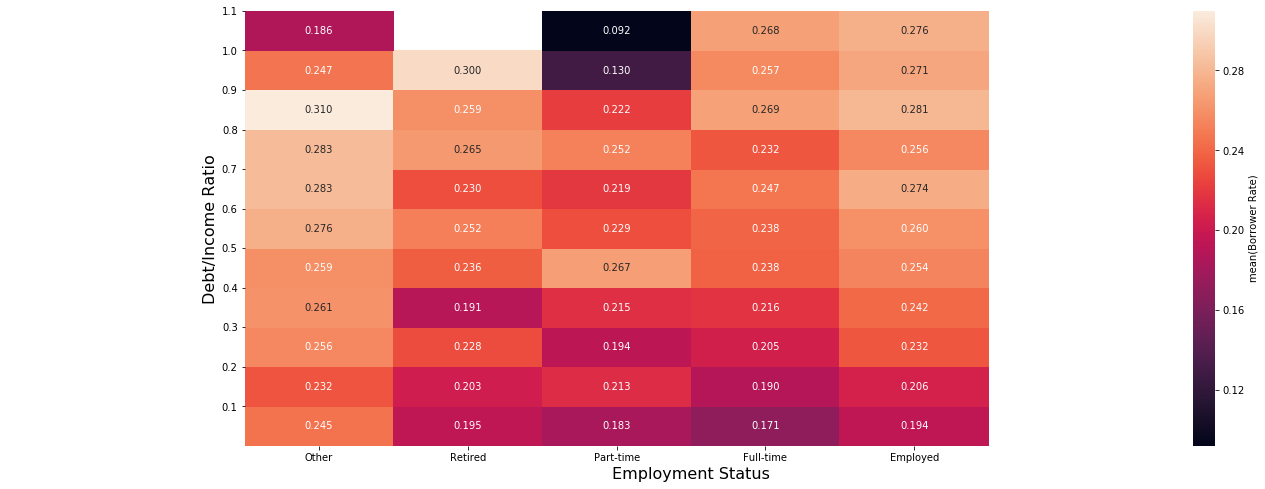

In [109]:
plt.figure(figsize = [20, 8])

cat_means = LoanDataOutcome2.groupby(['EmploymentStatus','DebtToIncomeRatioDisc']).mean()['BorrowerRate'] 
cat_means = cat_means.reset_index(name = 'BorrowerRate_avg')
cat_means = cat_means.pivot(index = 'DebtToIncomeRatioDisc', columns = 'EmploymentStatus', values = 'BorrowerRate_avg')
sns.heatmap(cat_means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'mean(Borrower Rate)'});
plt.xlim(2,8);
plt.ylim(0,11);
plt.yticks([1,2,3,4,5,6,7,8,9,10,11], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1]);
plt.xlabel('Employment Status', fontsize = 16);
plt.ylabel('Debt/Income Ratio', fontsize = 16);

> We can see here a very similar pattern as the one shown in the Multivar Viz #2, but with opposite signs between the Borrower Rate and the previous ProsperRating, and this makes sense as they are, as we have seen before, inversely correlated. 

> The Borrower Rate decreases moving from top to bottom, as the debt/income ratio decreases. Weaker pattern for the debt/income ratio values over 0.8.
Also amoving from more unstable to more stable employment statuses, we can see an overall decrease in the Borrower Rate. In particular, the zone with the lowest rates is for Retired, Part-timers, Full-timers and Employed up to a maximum of 0.2 debt/income ratio. Again the lowest borrower rates are for Part-timers with a debt/income ratio over 0.9, still due to 3 outliers that are the only data-points in those 2 cells.

### Multivar Viz #4: Exploring how the Prosper Rating, the Amount Delinquent and the Delinquencies in the last 7 Years are related

In [110]:
LoanDataOutcome['ProsperRating (numeric)'].value_counts()

3.0    5529
4.0    3902
2.0    3571
6.0    3565
5.0    3467
1.0    3271
7.0    1747
Name: ProsperRating (numeric), dtype: int64

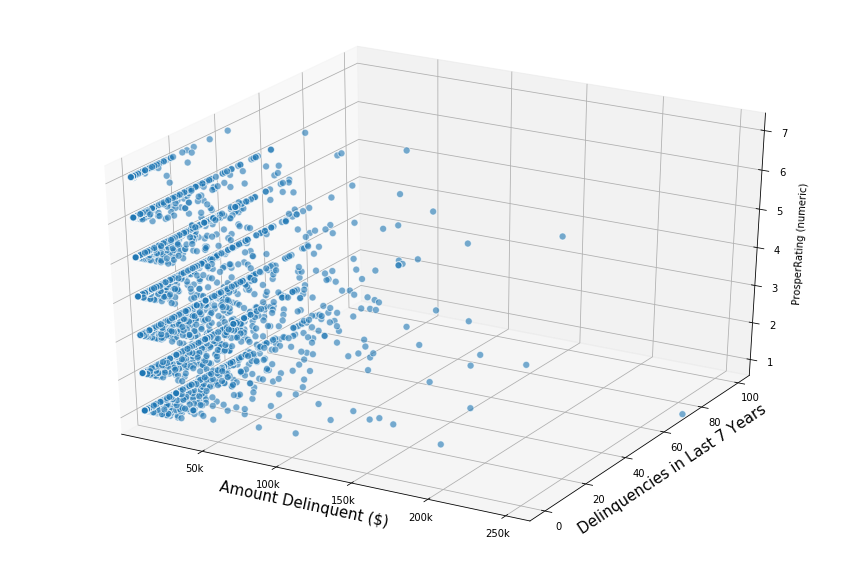

In [111]:
# As was previously shown in the bivariate analysis, both the 'AmountDelinquent' and the 
# 'DelinquenciesLast7Years' are negatively correlated to the Rating when taken individually. 
# Also, the higher the number of delinquencies, the higher the amount delinquent

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d');

xs = LoanDataOutcome['AmountDelinquent']
ys = LoanDataOutcome['DelinquenciesLast7Years']
zs = LoanDataOutcome['ProsperRating (numeric)']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w'); 

ax.set_xlabel('AmountDelinquent');
ax.set_ylabel('DelinquenciesLast7Years');
ax.set_zlabel('ProsperRating (numeric)');

plt.xlim(0,260000);

plt.xlabel('Amount Delinquent ($)', fontsize = 15);
plt.ylabel('Delinquencies in Last 7 Years', fontsize = 15);

plt.xticks([50000,100000,150000,200000,250000], ['50k','100k','150k','200k','250k']);

> As was previously shown in the bivariate analysis, both the Amount Delinquent and the Delinquencies in the Last 7 Years are negatively correlated to the Prosper Rating when taken individually. Also, the higher the number of Delinquencies, the higher the Amount Delinquent.
>
> From the 3-Dimensional scatter plot above, we can clearly confirm this pattern where the lower we go along the vertical axis, the more the data-points increase their spread (variability). In particular, moving down, more and more data-points deviate towards higher values of Amount Delinquent (to the right along the x-axis) and Delinquencies in the last 7 years (to the rear along the y-axis). And this is not due to the increasing number of data-point as we might initially think, as counting the values, only the score “7” has roughly half of the data-points of the other scores, all the other scores have comparable numbers of data-points. To support this idea we can clearly see the data-points with score “3”, which are the most numerous, have lower variability then the ones scoring “4” or more, tighter clustered close to the zeroes of the x and y axis. 

### Multivar Viz #5: Exploring how the Prosper Rating, the Debt/Income Ratio and the Delinquencies in the last 7 Years are related

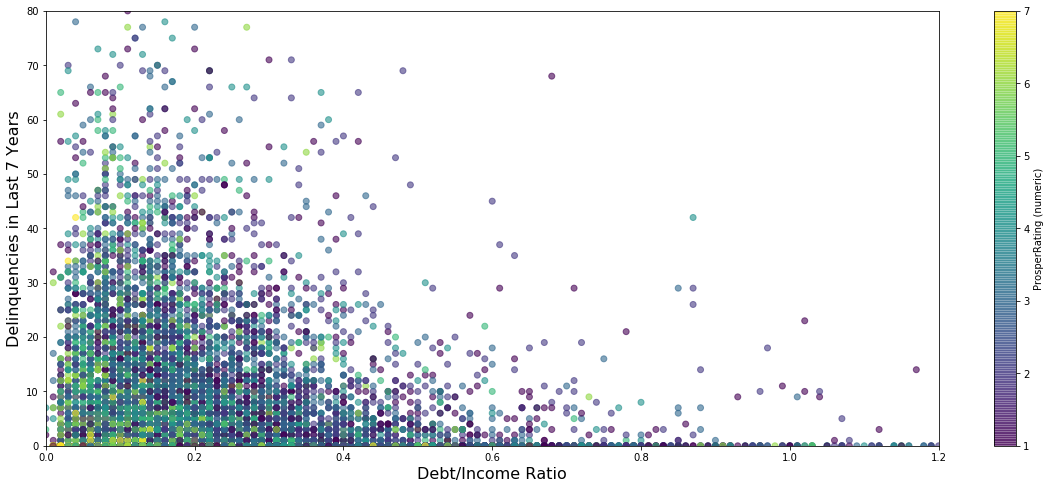

In [112]:
plt.figure(figsize = [20, 8])

plt.scatter(data = LoanDataOutcome, x = 'DebtToIncomeRatio', y = 'DelinquenciesLast7Years', c = 'ProsperRating (numeric)', alpha=0.6);
plt.colorbar(label = 'ProsperRating (numeric)');

plt.xlim(0,1.2);

plt.ylim(0,80);

plt.xlabel('DebtToIncomeRatio', fontsize = 12);
plt.ylabel('DelinquenciesLast7Years', fontsize = 12);

plt.xlabel('Debt/Income Ratio', fontsize = 16);
plt.ylabel('Delinquencies in Last 7 Years', fontsize = 16);

> The scatter plot above clearly shows that the points become darker and darker as they move away from the origin of the axis **x** and **y**. This means that the Score decreases as the debt/income ratio and the number of delinquencies increase. 

### Multivar Viz #6: Exploring how the Stated Monthly Income, the Loan Status and the Employment Status are related

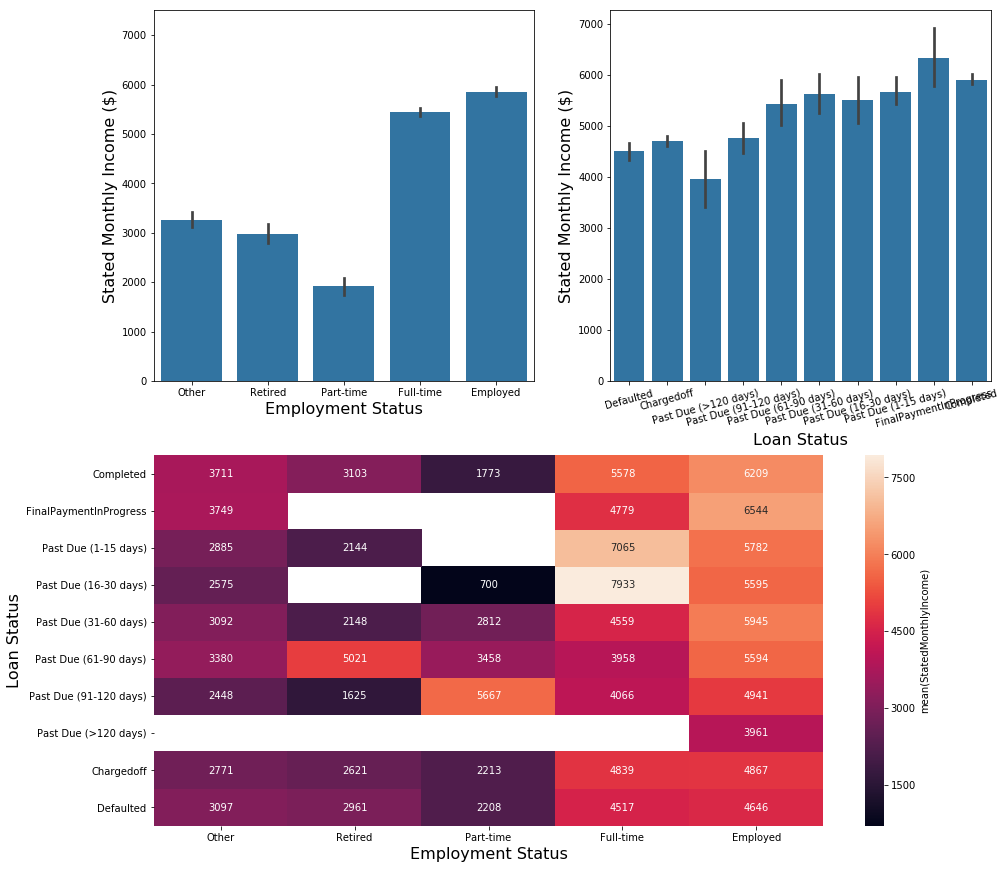

In [113]:
plt.figure(figsize = [15, 15])

# chart on top left
plt.subplot(2, 2, 1)
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcomeWONo_Self, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', color =base_color)
plt.ylim(0,7500);
plt.ylabel('Stated Monthly Income ($)', fontsize = 16);
plt.xlabel('Employment Status', fontsize = 16);

# chart on top right
plt.subplot(2, 2, 2)
base_color = sns.color_palette()[0]
ax = sns.barplot(data = LoanDataOutcomeWONo_Self, x = 'LoanStatus', y = 'StatedMonthlyIncome', color =base_color)
plt.xticks(rotation = 15); 
plt.ylabel('Stated Monthly Income ($)', fontsize = 16);
plt.xlabel('Loan Status', fontsize = 16);

# chart on bottom
plt.subplot(2, 1, 2)
cat_means = LoanDataOutcomeWONo_Self.groupby(['EmploymentStatus', 'LoanStatus']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome_avg')
cat_means = cat_means.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', values = 'StatedMonthlyIncome_avg')
ax = sns.heatmap(cat_means, annot = True, fmt = '.0f', cbar_kws = {'label' : 'mean(StatedMonthlyIncome)'});
ax.invert_yaxis()

plt.xlabel('Employment Status', fontsize = 16);
plt.ylabel('Loan Status', fontsize = 16);

> The heat-map shows the breakdown of the two bar-charts on top:
>
> `a` We can confirm the overall pattern that as we move to the right, from lower stability employments to higher stability ones, the average income increases, except for the part-timers which has the lowest value (which makes sense as the income is also proportional to the number of hours worked).
>
> `b` We can see that the pattern shown on the bar-chart on the top right (average income increasing with the positivity of the outcome of the loan) is not consistent through the different employment statuses, and it seems mainly due to the "Employed" status being the one with the majority of the data-points, therefore biasing the overall means

### Main findings discovered during the Multivariate Exploration Process:

> In the **Multivar Viz #1**, the relations between the three features of interest 'ProsperRating (numeric)', 'LoanStatus' and 'BorrowerRate' were analysed deeper. In particular, I wanted to see the breakdown of how the borrower rate varied compared to the loan status, for each rating values. Looking at the point-plot, we can clearly confirm the strong negative correlation between the Rating and the Borrower rate.  We can also see that overall the lines, showing the borrower rate, are moving downwards as we move to the right of the chart along the horizontal axis, going from negative loan outcomes to more positive ones. We can see here that there is no rating line that prevails on the others for this tendency, and all the slopes are comparable. 
>
> The main take-away here is that the borrower rate varies much more based on the rating then based on the loan status. This makes sense because the borrower rate is a consequence of the rating, therefore decided after the rating, whereas the borrower rate is decided before knowing the outcome of the loan (obviously), therefore there is much more margin for uncertainty between borrower rating and loan status then between borrower rate and rating.
>

> In the **Multivar Viz #2**, excluding the "Not employed" and "Self-employed" statuses, as they have only 1 occurrence each, thus not representative, we can see from the heat-map the overall pattern where the rating increases moving from top to bottom, which means as the debt/income ratio decreases. However this pattern becomes weaker for the top values of the debt/income ratio displayed (over 0.8).
It's worth mentioning that this patter is extremely consistent in the "Employed" status, and as the "Employed" status is the most frequent, it plays a big role in defining the overall pattern.
>
> Also as we move to the right along the **x** axis (which means from more unstable to more stable employment statuses), we can see an overall increase in the rating. 
In particular, the zone with the highest rating is for Retired, Part-timers, Full-timers and Employed up to a maximum of 0.2 debt/income ratio. 
Interesting to notice that the highest ratings are for Part-timers with a debt/income ratio over 0.9, and this is due to 3 outliers that are the only data-points in those 2 cells.

> In the **Multivar Viz #3**, we can see a very similar pattern as the one shown in the Multivar Viz #2, but with opposite signs between the Borrower Rate and the previous ProsperRating, and this makes sense as they are, as we have seen before, inversely correlated. 
>
> The Borrower Rate decreases moving from top to bottom, as the debt/income ratio decreases. The pattern is weaker for the debt/income ratio values over 0.8.
Also amoving from more unstable to more stable employment statuses, we can see an overall decrease in the Borrower Rate. In particular, the zone with the lowest rates is for Retired, Part-timers, Full-timers and Employed up to a maximum of 0.2 debt/income ratio. Again the lowest borrower rates are for Part-timers with a debt/income ratio over 0.9, still due to 3 outliers that are the only data-points in those 2 cells.

> In the **Multivar Viz #4**, from the 3-Dimensional scatter plot, we can clearly see a pattern where the lower we go along the vertical axis, the more the data-points increase their spread (variability). In particular, moving down, more and more data-points deviate towards higher values of Amount Delinquent and Delinquencies in the last 7 years. This is not due to the increasing number of data-point as we might initially think, as counting the values, only the score “7” has roughly half of the data-points of the other scores. All the other scores have comparable numbers of data-points. To support this idea we can clearly see the data-points with score “3”, which are the most numerous, have lower variability then the ones scoring “4” or more, tighter clustered close to the zeroes of the **x** and **y** axis. 

> In the **Multivar Viz #5**, from the chromatic scatter plot we can clearly see that the points become darker and darker as they move away from the origin of the axis **x** (debt/income ratio) and **y** (number of delinquencies). This means that the Score decreases as the debt/income ratio and the number of delinquencies increase.

>  In the **Multivar Viz #6**, we can confirm the overall pattern that as we move from lower stability employments to higher stability ones, the average income increases, except for the part-timers which has the lowest value (which makes sense as the income is also proportional to the number of hours worked).
>
> Also, we can see that the pattern shown on the bar-chart on the top right (average income increasing with the positivity of the outcome of the loan) is not consistent through the different employment statuses, and it seems mainly due to the "Employed" status being the one with the majority of the data-points, therefore biasing the overall means.

## Export dataset to be used  for Data Visualization on Tableau

In [115]:
LoanDataClean.to_csv('LoanDataClean.csv')

In [ ]:
import webbrowser
webbrowser.open('https://public.tableau.com/profile/federico6844#!/vizhome/ProsperLoan-DataVisualization/Dashboard3?publish=yes')